# Lending Club Case Study

## This is the approach that we will take: 
1. First we will check which columns have most of the values as NA. 
2. We will remove the columns related to that. Next we will remove the rows which have only 1 unique value. 
3. After that there are few columns which have encoded such as zip code and ID columns. Post that we remove some customer behaviour variables as well.
4. We will remove rows with loan status as current since they are not required for analysis
5. We will then go for univariate analysis
6. Post that we will go for analysis on derived metrics
7. We will then go for some bivariate analysis on categorical and continuous variables
8. We will summarize after that

##### Let's import all required libraries for our analysis

In [582]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Reading all the data now

In [583]:
import pandas as pd
df = pd.read_csv(r"C:\Users\I555177\Documents\Upgrad Activities\loan\loan.csv")

C:\Users\I555177\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


##### Checking shape of our data

In [584]:
df.shape

(39717, 111)

##### Check for missing values in our dataset

In [585]:
(df.isnull().sum()/len(df))*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

<AxesSubplot:>

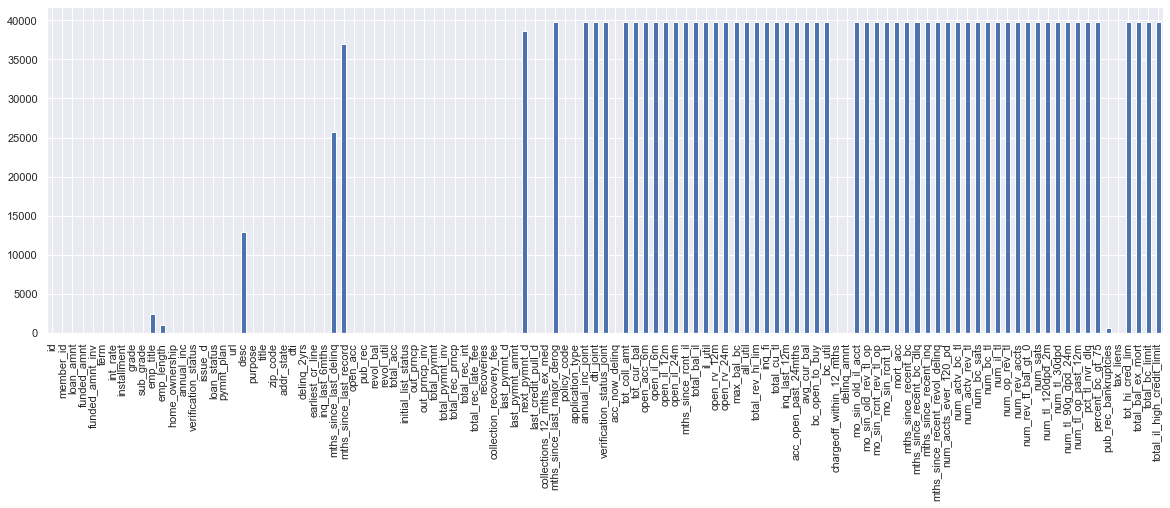

In [586]:
df.isnull().sum().plot(kind='bar', figsize=[20,6])

##### We can observe there are many columns having 100% null values and some also have significant number of null values. Let's first drop all the data columns having more than 10000 null values (nearly 25% of whole data)

In [587]:
df_remove_na = df.loc[:,(df.isnull().sum()/len(df))*100<=50]

In [588]:
df_remove_na

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,80.90,Jun-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,281.94,Jul-10,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,0.00,Jun-07,NaN,1,INDIVIDUAL,0,NaN,0,NaN,NaN


##### Taking only the data that has less than 15pc of its records as null

In [589]:
df_for_analysis = df.loc[:,(df.isnull().sum()/len(df))*100<=15]

##### Checking the distrubution of the numeric values, we can see below that a lot of them still have only 1 value (0)

In [590]:
df_for_analysis.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,39717.000000,39717.000000,39717.000000,39661.0,39717.0,39717.0,39661.0,39717.0,39020.000000,39678.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,95.221624,12.406112,2678.826162,0.0,1.0,0.0,0.0,0.0,0.043260,0.0
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,688.744771,148.671593,4447.136012,0.0,0.0,0.0,0.0,0.0,0.204324,0.0
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,0.000000,0.000000,218.680000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,0.000000,0.000000,546.140000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,0.000000,0.000000,3293.160000,0.0,1.0,0.0,0.0,0.0,0.000000,0.0
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,29623.350000,7002.190000,36115.200000,0.0,1.0,0.0,0.0,0.0,2.000000,0.0


##### Checking attributes which have uniqueness as only 1. They wouldn't add any benefit for our analysis since they have a single constant value

In [591]:
loan_unique = df_for_analysis.nunique()
loan_unique = loan_unique[loan_unique.values ==1]
loan_unique

pymnt_plan                    1
initial_list_status           1
collections_12_mths_ex_med    1
policy_code                   1
application_type              1
acc_now_delinq                1
chargeoff_within_12_mths      1
delinq_amnt                   1
tax_liens                     1
dtype: int64

In [592]:
df_for_analysis = df_for_analysis.loc[:,df_for_analysis.nunique()>1]

In [593]:
df_for_analysis.shape

(39717, 44)

In [594]:
loan_unique = df_for_analysis.nunique()
loan_unique

id                         39717
member_id                  39717
loan_amnt                    885
funded_amnt                 1041
funded_amnt_inv             8205
term                           2
int_rate                     371
installment                15383
grade                          7
sub_grade                     35
emp_title                  28820
emp_length                    11
home_ownership                 5
annual_inc                  5318
verification_status            3
issue_d                       55
loan_status                    3
url                        39717
purpose                       14
title                      19615
zip_code                     823
addr_state                    50
dti                         2868
delinq_2yrs                   11
earliest_cr_line             526
inq_last_6mths                 9
open_acc                      40
pub_rec                        5
revol_bal                  21711
revol_util                  1089
total_acc 

##### Now lets clean other data with which we're not going to work. we can also remove zip code as its last two digits are missing everywhere. We are retaining Id for now since this makes the row as unique and it might be useful later when we are counting for group by and pivoting data

In [595]:
drop_columns = ['member_id','url','zip_code']
df_for_analysis.drop(drop_columns, axis = 1,inplace = True)
df_for_analysis.shape

(39717, 41)

### There are some Customer Behaviour variables which can be removed as well, since these are unavaialable during loan application and are provided by credit bureau

In [596]:
drop_columns_customer_behaviour = ['delinq_2yrs','inq_last_6mths','open_acc','pub_rec','revol_bal','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
df_for_analysis.drop(drop_columns_customer_behaviour, axis = 1,inplace = True)
df_for_analysis.shape

(39717, 25)

##### Employee title has so many unique values that it is difficult to analyze, looks more like a textual column input by applicants. We will drop this

In [597]:
df_for_analysis.drop('emp_title', axis=1, inplace=True)

##### Checking the distribution of rows for categorical variable loan_status which is the target variable that we would have to provide recommendations against

In [598]:
df_for_analysis.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

##### Getting rid of 'Current' loan status since they don't provide any information about defaulters

In [599]:
df_for_analysis= df_for_analysis.loc[~(df_for_analysis['loan_status'] == 'Current')]

##### Checking info of our dataframe to be used for analysis

In [600]:
df_for_analysis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  object 
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            37544 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc            38577 non-null  float64
 12  verification_status   38577 non-null  object 
 13  issue_d               38577 non-null  object 
 14  loan_status           38577 non-null  object 
 15  purpose            

### Univariate Analysis

##### Let's define a function which could be helpful for the univariate analysis of different variables. For this, we can take percentage of overall and charged off data.

In [601]:
df_for_analysis_chargeoff = df_for_analysis.loc[df_for_analysis['loan_status']=='Charged Off']

In [602]:
def univariate_analysis(df1, df2, column, x,y, xlabel):
    
        fig, ax = plt.subplots(ncols=2, nrows=1, sharex=True, figsize=(int(x),int(y)))

        term_overall = (df1[column].value_counts()*100/df1.shape[0]).plot.bar(color=sns.color_palette("Set2"),ax=ax[0])
        term_overall.set_xlabel(str(xlabel), fontdict={'fontsize':15, 'fontweight':5, 'color':'Red'})
        term_overall.set_ylabel("% of overall data", fontdict={'fontsize':15, 'fontweight':5, 'color':'Red'})

        for p in term_overall.patches:
            term_overall.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

        term_chareged_off = (df2[column].value_counts()*100/df2.shape[0]).plot.bar(color=sns.color_palette("Set2"), ax=ax[1])
        term_chareged_off.set_xlabel(str(xlabel), fontdict={'fontsize':15, 'fontweight':5, 'color':'Red'})
        term_chareged_off.set_ylabel("% of charged off data", fontdict={'fontsize':15, 'fontweight':5, 'color':'Red'})
        
        for p in term_chareged_off.patches:
            term_chareged_off.annotate(format(p.get_height(), '.2f'),
                   (p.get_x() + p.get_width() / 2,
                    p.get_height()), ha='center', va='center',
                   size=15, xytext=(0, 8),
                   textcoords='offset points')

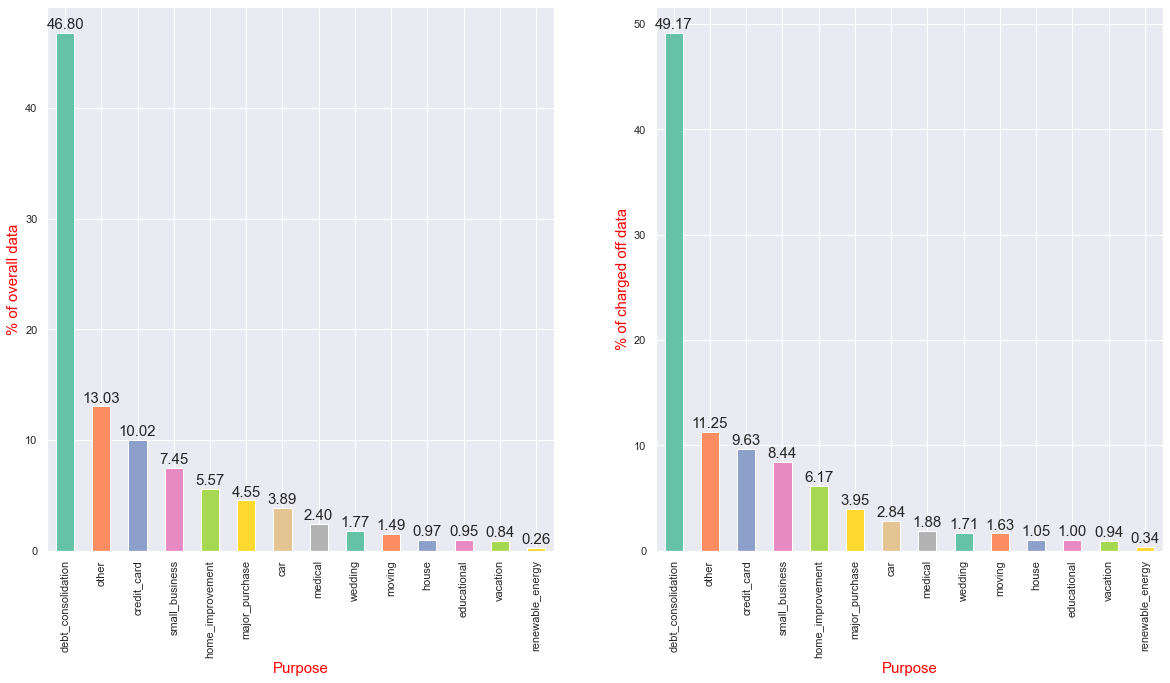

In [603]:
univariate_analysis(df1= df_for_analysis, df2=df_for_analysis_chargeoff, column="purpose", x=20, y=10, xlabel="Purpose")

#### Observations:-

If we compare the percentage of charged off data with percentage of overall data for purpose of loan, we can find that loan for 'renewable energy' increased from 0.26 in overall data to 0.34 in chaged off data which is almost 30% of increment. Similarly we found out that in case of small business and vacation it has increased almost 13% and 11% respectively.

Therefore, risk factor increases if the loan is being taken for Renewable energy, Small business and vacation.

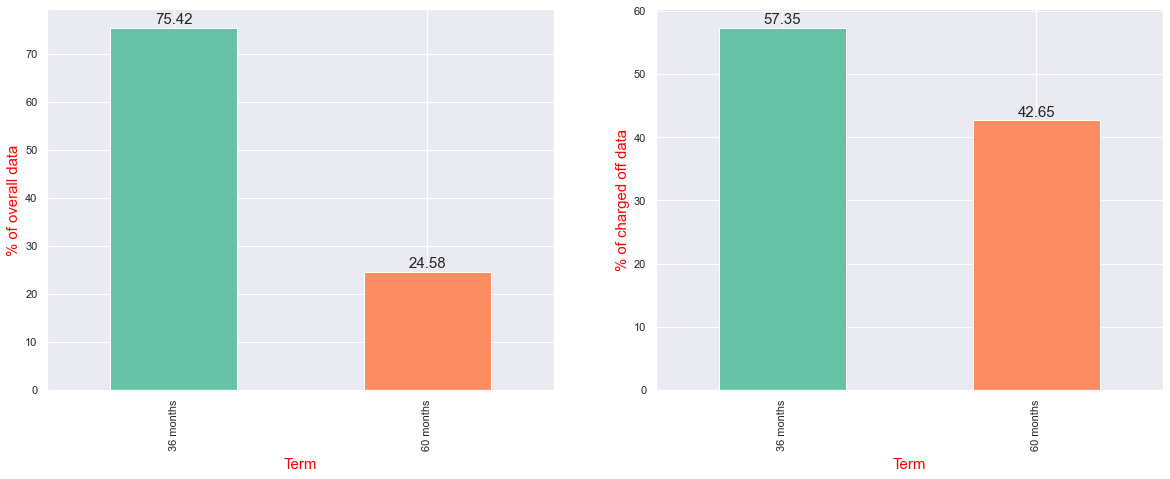

In [604]:
univariate_analysis(df1= df_for_analysis, df2=df_for_analysis_chargeoff, column="term", x=20, y=7, xlabel="Term")

#### Observations:-

Here, we can observed that if loan is taken with 60 months of term, then its charged off risk increases significantlly. In this case, it has increased almost 73% in comparision with overall data.

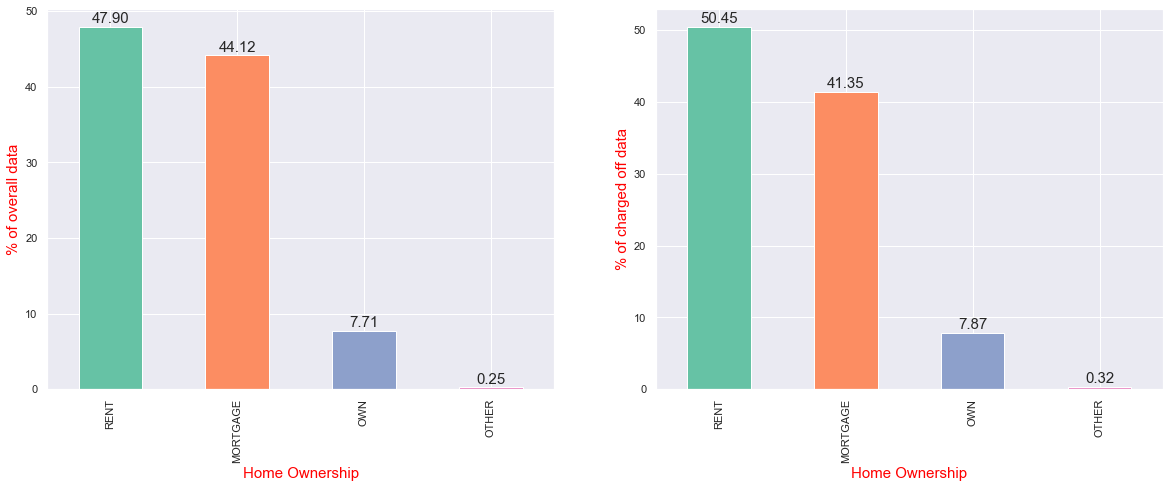

In [605]:
univariate_analysis(df1= df_for_analysis, df2=df_for_analysis_chargeoff, column="home_ownership", x=20, y=7, xlabel="Home Ownership")

#### Observations:-

Any significant changes has not been observed which could ascertain anything related to loan chaged off.

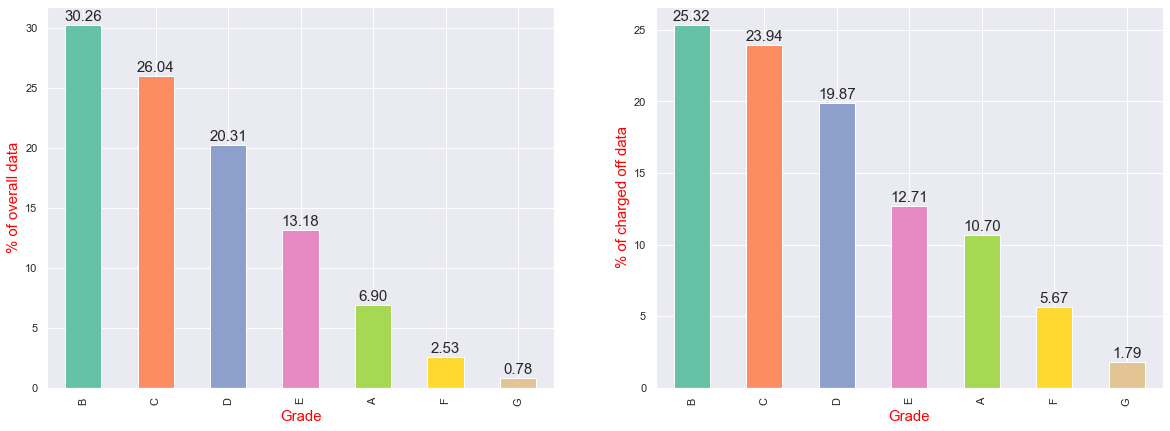

In [606]:

univariate_analysis(df1= df_for_analysis, df2=df_for_analysis_chargeoff, column="grade", x=20, y=7, xlabel="Grade")


#### Observations:-

In this analysis, we found grade F and G have the highest risk factors among others as in chaged off data F and G increased almost 124% and 129% respectively.
In case of A grade, we can also find it has more 55% more presence than overall data. It may be happening because lender giving more amount of loans to grade A. So they're defaulting to some extent.

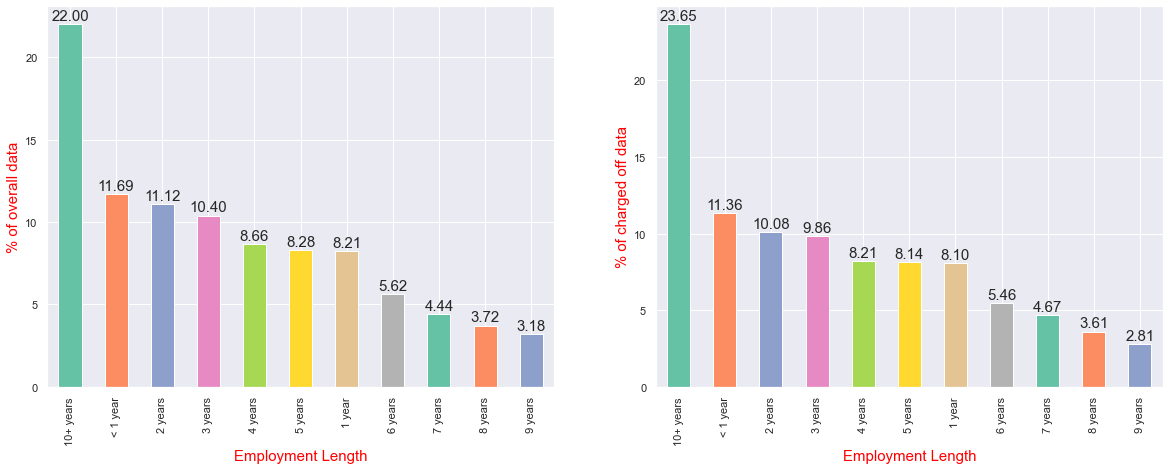

In [607]:
univariate_analysis(df1= df_for_analysis, df2=df_for_analysis_chargeoff, column="emp_length", x=20, y=7, xlabel="Employment Length")

#### Observations:-

Here, although we did not find any significant changes but applicants who have more than 10 years of employment length are more risk than others.

##### Let us check the distribution of loan amount to check in which range are the maximum loans taken

<AxesSubplot:>

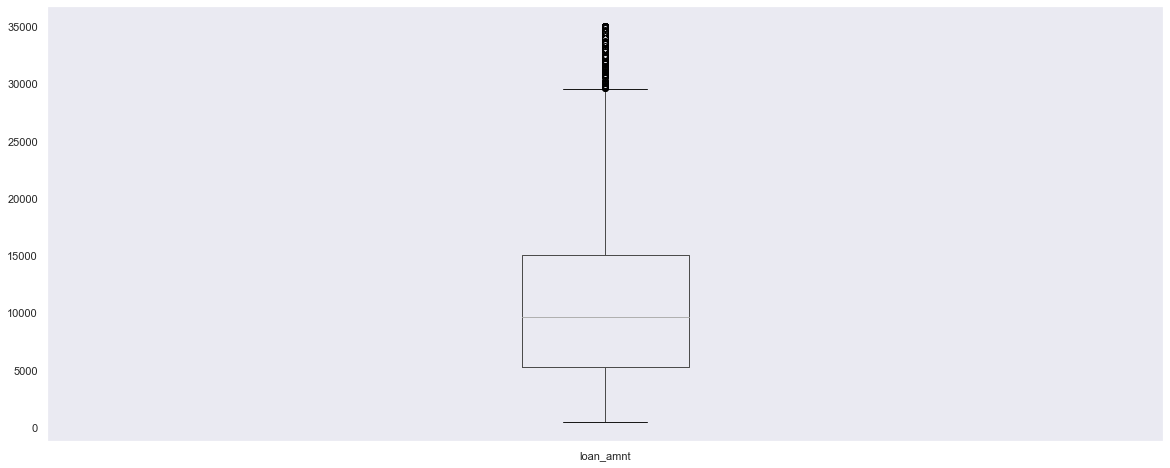

In [608]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_for_analysis.boxplot(column = 'loan_amnt', grid = False)

##### There are outliers here which we should remove

In [609]:
df_for_analysis['loan_amnt'].describe()

count    38577.000000
mean     11047.025430
std       7348.441646
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [610]:
# taking the 95 percentile of values
df_for_analysis_outlier_removal = df_for_analysis.loc[df_for_analysis['loan_amnt']<df_for_analysis["loan_amnt"].quantile(0.95)]


In [611]:
#Checking the distribution again
df_for_analysis_outlier_removal['loan_amnt'].describe()

count    35815.000000
mean      9702.986179
std       5626.715289
min        500.000000
25%       5000.000000
50%       8875.000000
75%      13600.000000
max      24975.000000
Name: loan_amnt, dtype: float64

<AxesSubplot:>

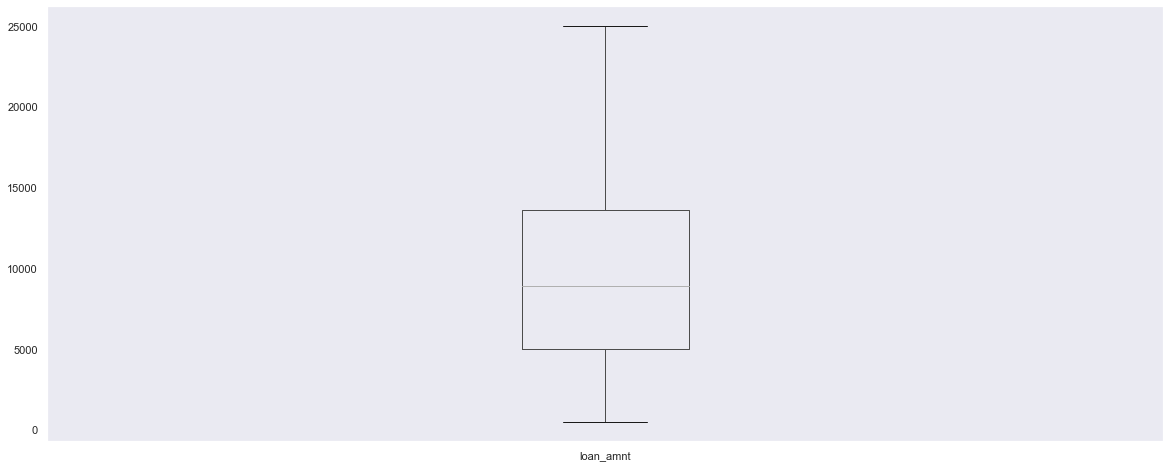

In [612]:
df_for_analysis_outlier_removal.boxplot(column = 'loan_amnt', grid = False)

##### The median of loan amonut falls at 9.5k approximately. Also, most of the loans are <=14k which is 75th percentile and the boxplot is skewed downwards which says that a lot of people are taking lesser loans. But, the gap between 75th to 100th percentile is huge which means that there are few people who are taking very large loans.

##### Checking the distribution of annual income

<AxesSubplot:>

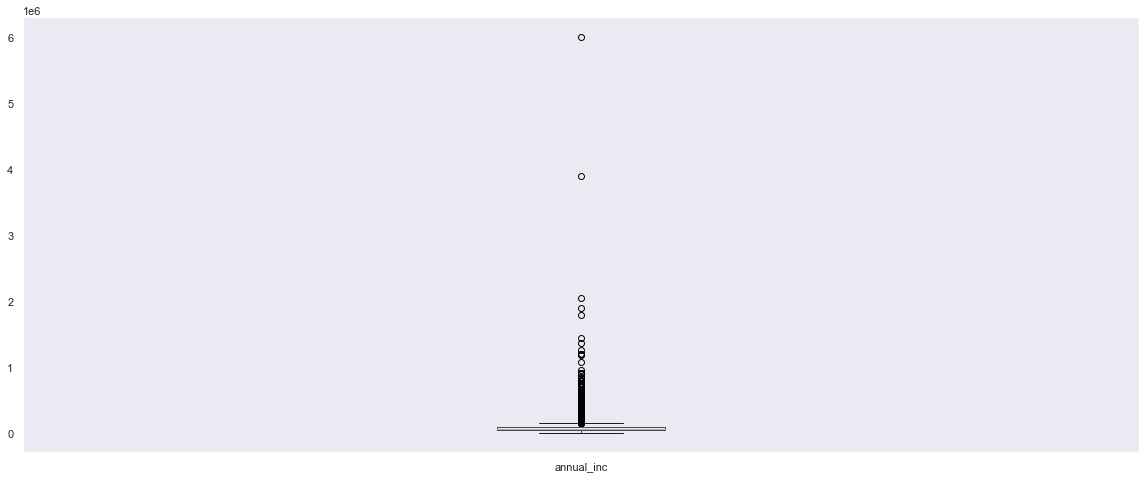

In [613]:
df_for_analysis.boxplot(column = 'annual_inc', grid = False)

##### Lots and lots of anomalies here

In [614]:
# Checking for distribution of annual income
df_for_analysis['annual_inc'].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [616]:
# Remove all the outliers
df_for_analysis_outlier_removal = df_for_analysis.loc[df_for_analysis['annual_inc']<df_for_analysis["annual_inc"].quantile(0.80)]


<AxesSubplot:>

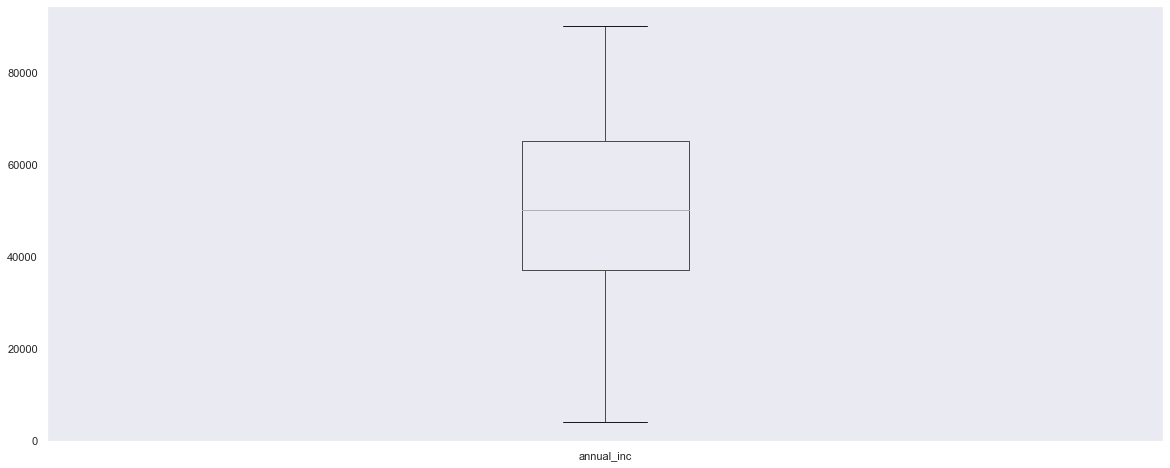

In [617]:
#Rechecking the box plot now
df_for_analysis_outlier_removal.boxplot(column = 'annual_inc', grid = False)

#####  median is somewhere at 50k and though the boxplot is skewed upwards towards the higher income levels, there is a wide gap between 25th percentile and minimum income, there are few people with very less income who are applying for loans

In [618]:
# Rechecking the distribution now
df_for_analysis_outlier_removal['annual_inc'].describe()

count    30544.000000
mean     51359.643595
std      18494.415829
min       4000.000000
25%      37000.000000
50%      50000.000000
75%      65000.000000
max      89916.000000
Name: annual_inc, dtype: float64

##### Checking the distribution of interest rates. Interest rate has a trailing % sign so we need to remove that first

In [619]:
df_for_analysis['int_rate'] = df_for_analysis['int_rate'].str[0:-1].astype(float)

In [620]:
df_for_analysis['int_rate'].describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

<AxesSubplot:>

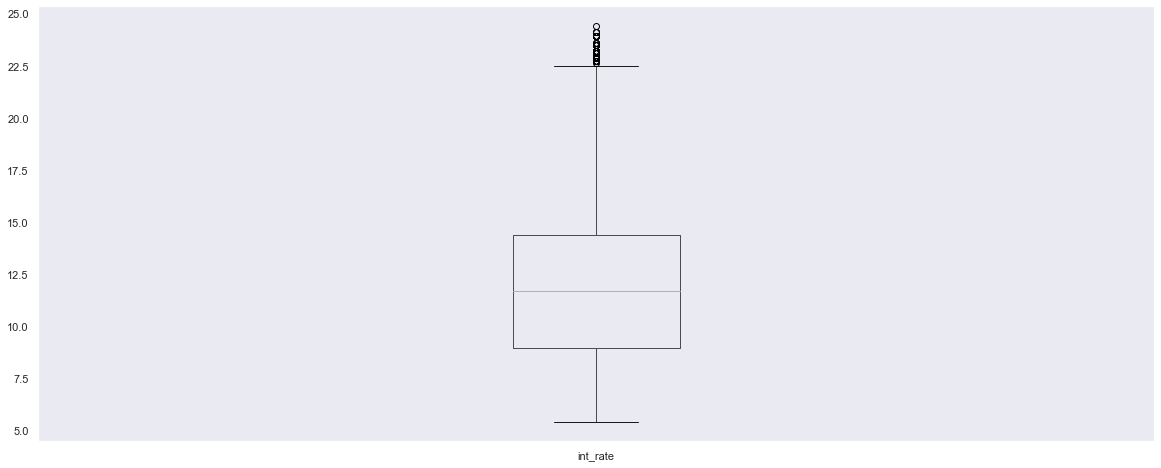

In [621]:
df_for_analysis.boxplot(column = 'int_rate', grid = False)

In [622]:
# removing the anomalies again
df_for_analysis_outlier_removal = df_for_analysis.loc[df_for_analysis['int_rate']<df_for_analysis["int_rate"].quantile(0.95)]


<AxesSubplot:>

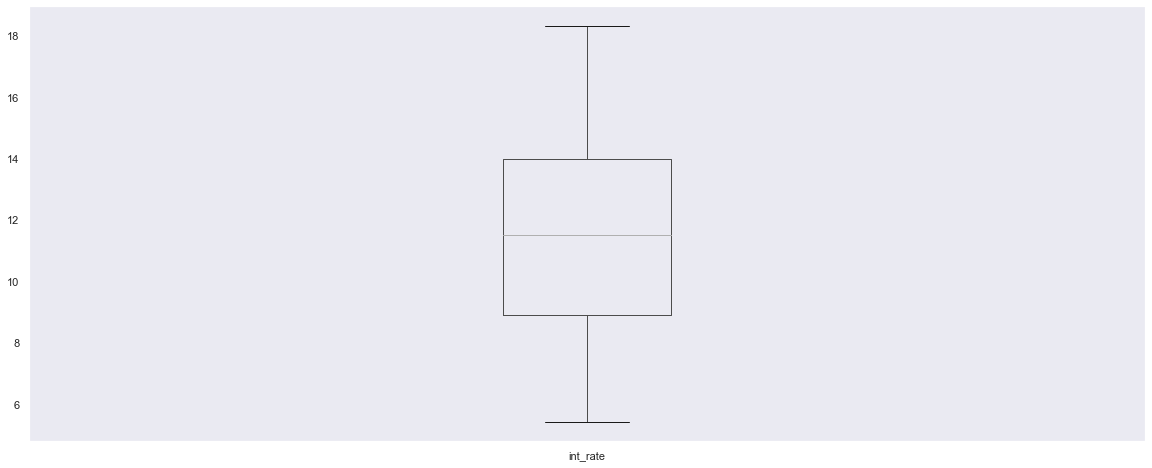

In [623]:
df_for_analysis_outlier_removal.boxplot(column = 'int_rate', grid = False)

##### Median of interest rate is at 11.5 pc. Most of the interest rates are below 14pc which is the 75th percentile

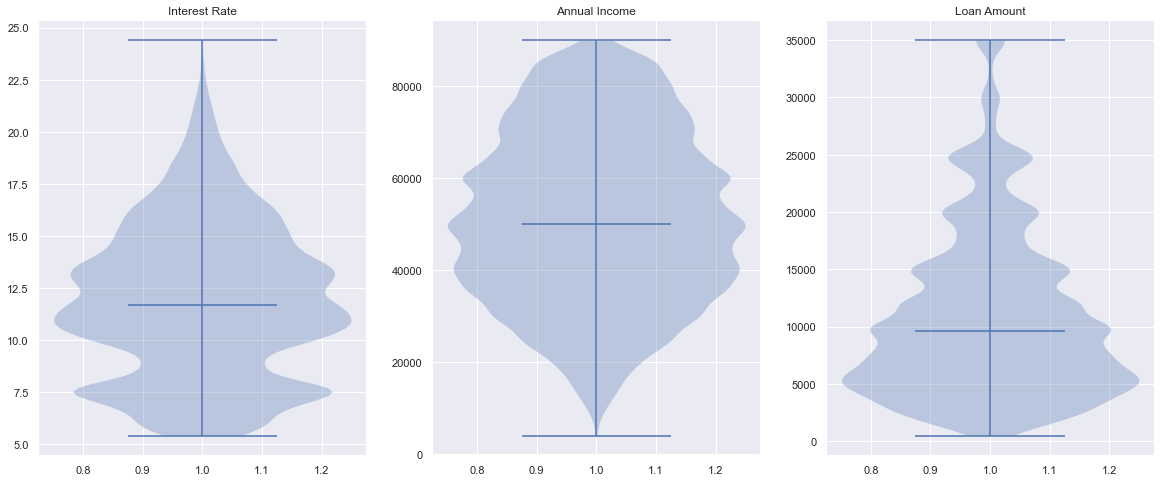

In [624]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)

# Plot violin plot on axes 1
ax1.violinplot(df_for_analysis.int_rate, showmedians=True)
ax1.set_title('Interest Rate')

df_for_analysis_outlier_removal_ann_inc = df_for_analysis.loc[df_for_analysis['annual_inc']<df_for_analysis["annual_inc"].quantile(0.80)]

# Plot violin plot on axes 2
ax2.violinplot(df_for_analysis_outlier_removal_ann_inc.annual_inc, showmedians=True)
ax2.set_title('Annual Income')

# Plot violin plot on axes 3
ax3.violinplot(df_for_analysis.loan_amnt, showmedians=True)
ax3.set_title('Loan Amount')

plt.show()

##### Checking the violin plot for these gives some interesting insights
        #1. For interest rate there are a lot of people taking interests above the median of 11pc. The thickness of distribution is pretty thick at 15 and thickens again at 16.5 pc approximately
        #2. Annual income is thickest at 40k and decreases rapidly 60k. Most of the annual incomes are centred arounf 40k-60k
        #3. The loan amount is thickest at 5k, but it also thickens intermittently for multiple of 5k. For higher loans it can be a problem, since people who can afford 18k loan might be going for 20k loan which might increase chargeoffs

##### We would like to check here the maximum amount of loans taken for some important categoricl variables such as home_ownership, grade, purpose, term, verification_status and emp_length

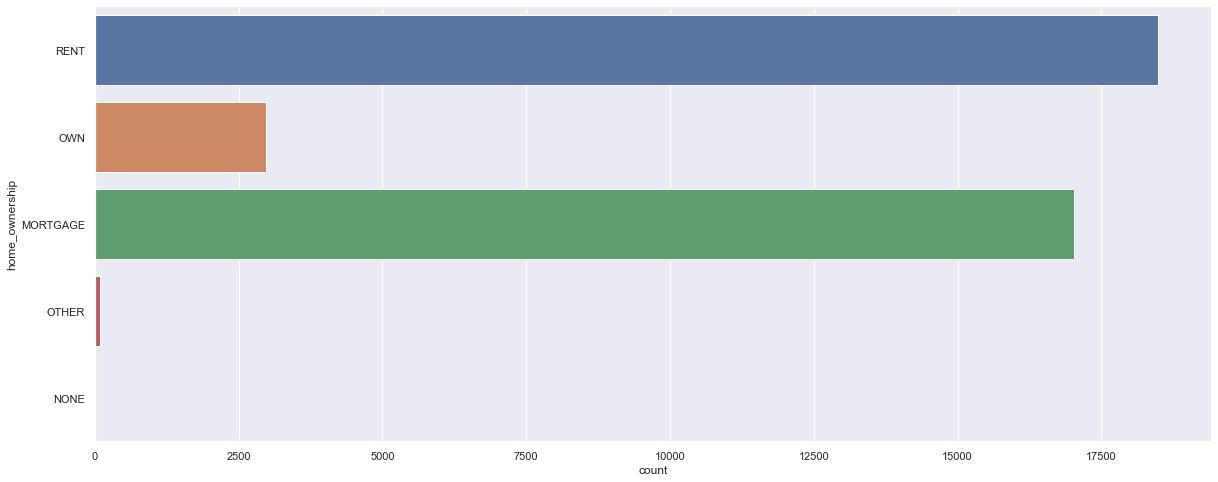

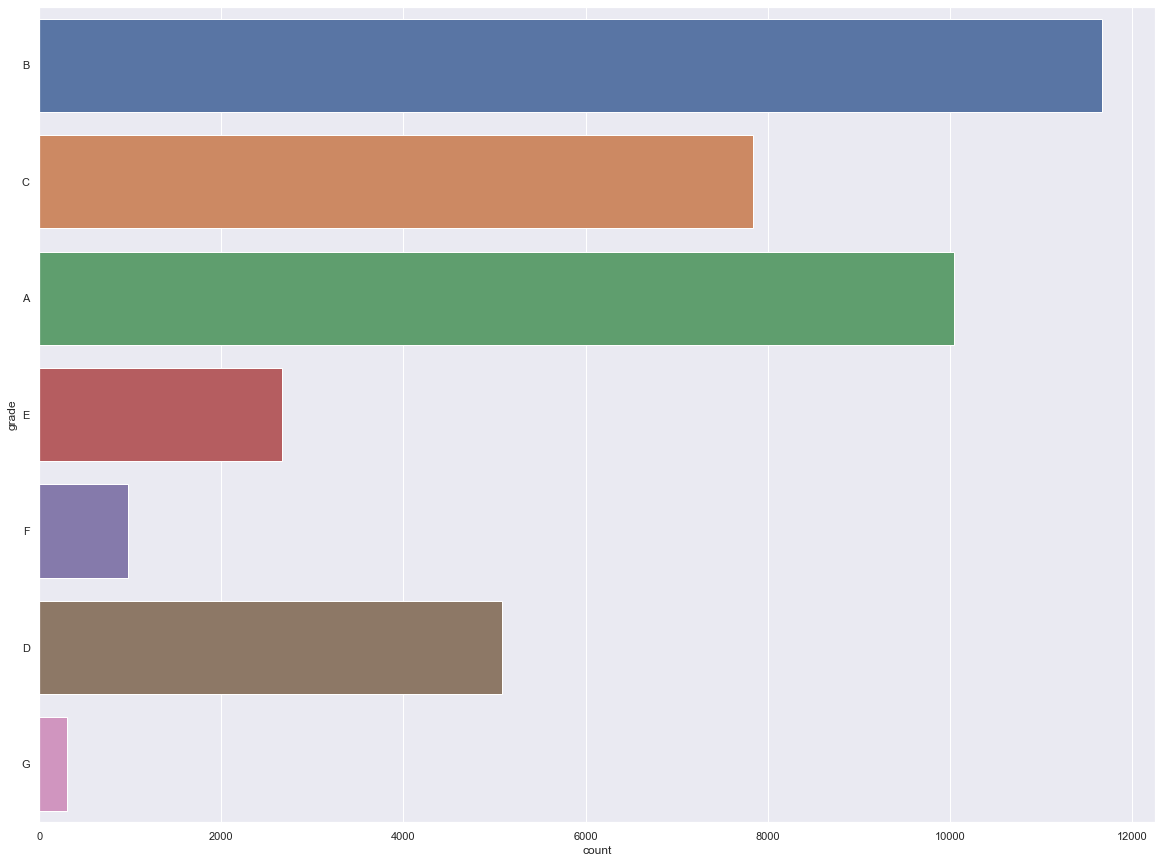

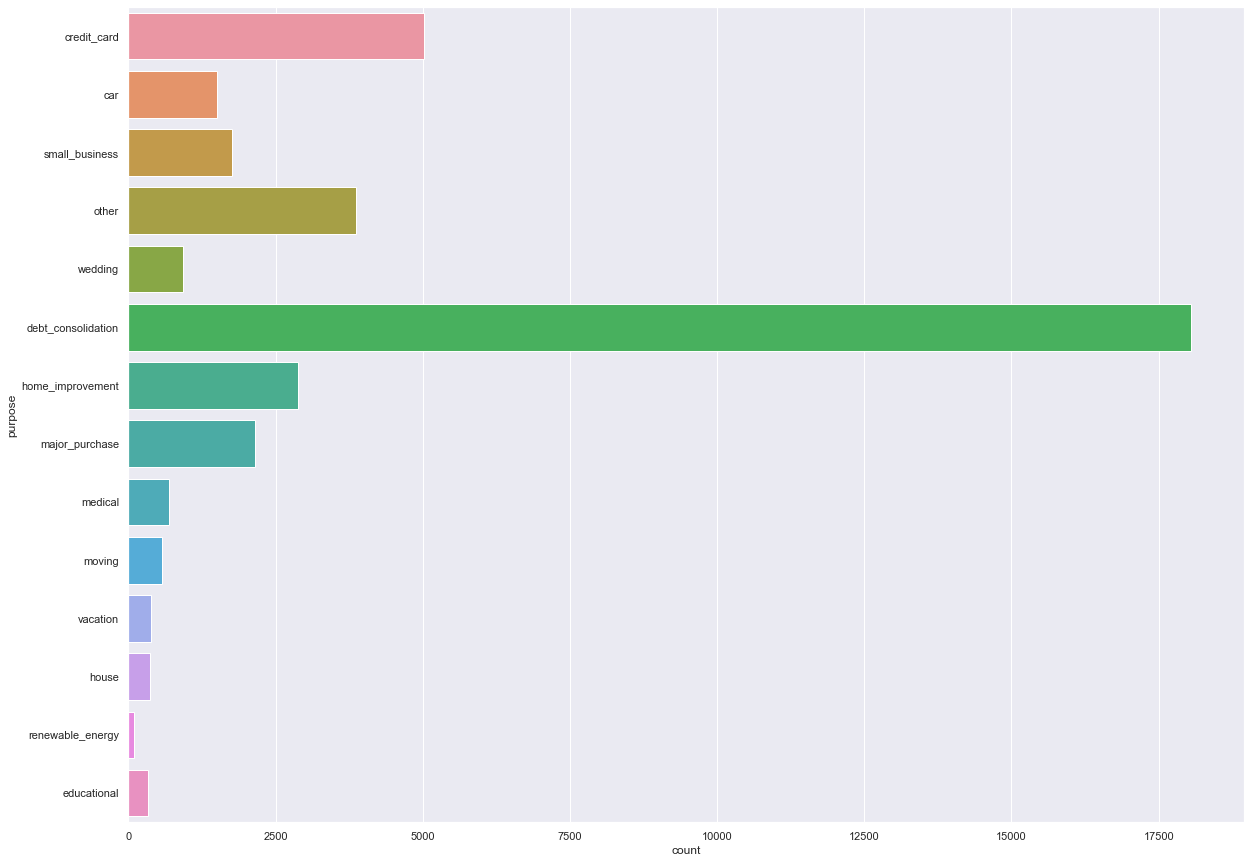

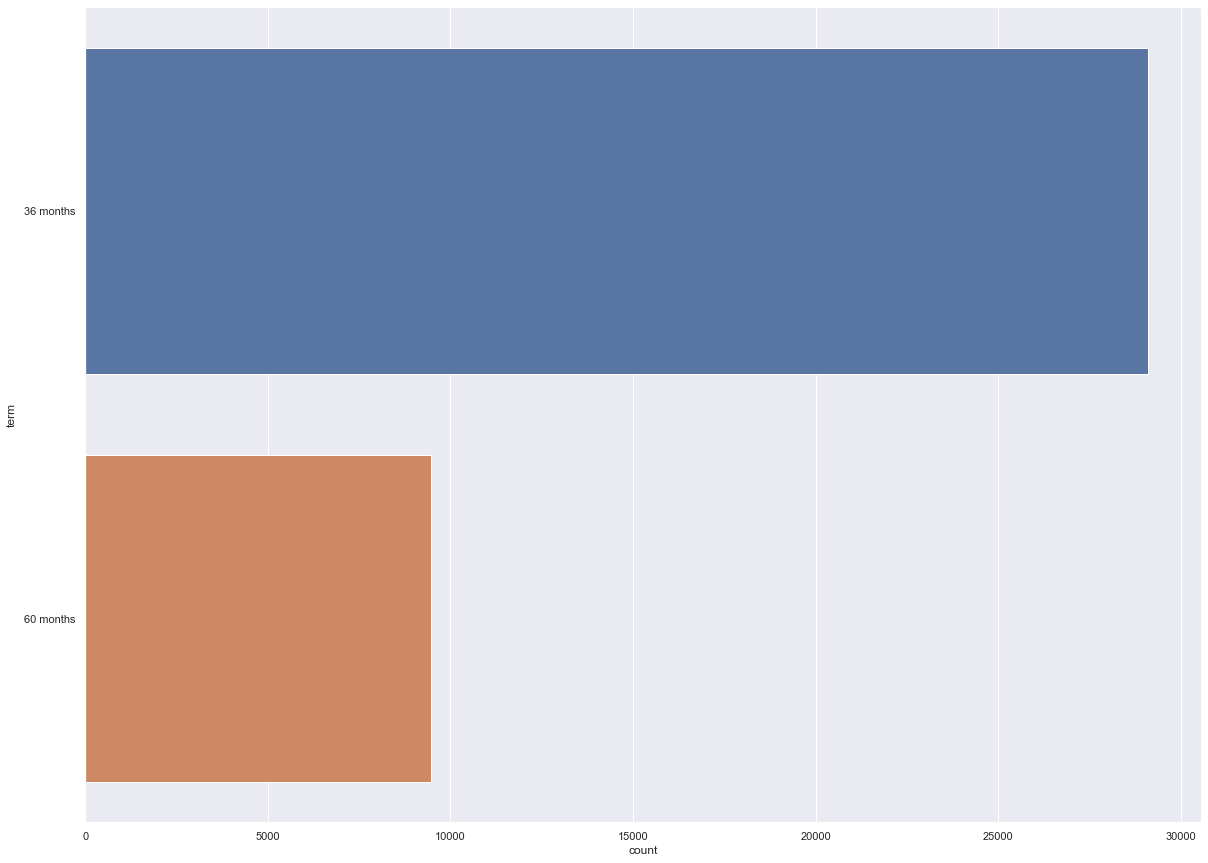

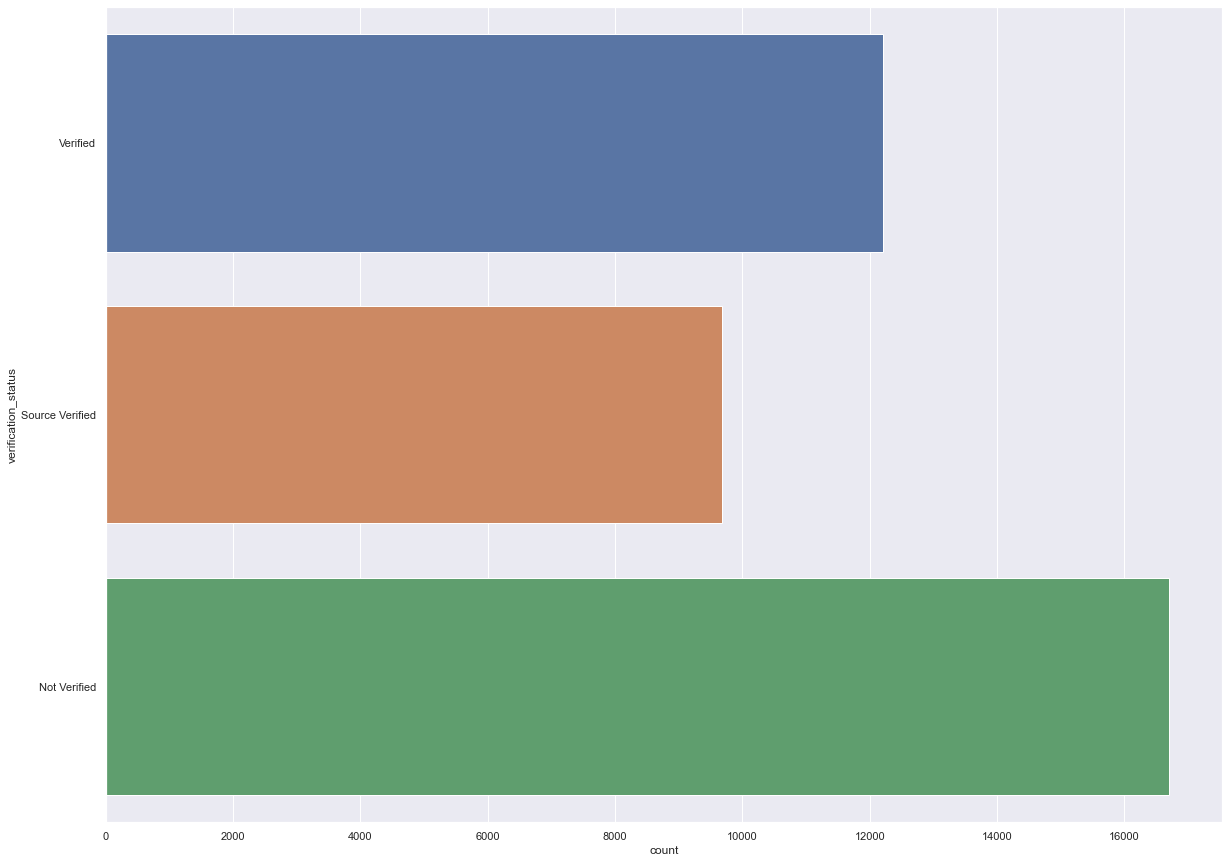

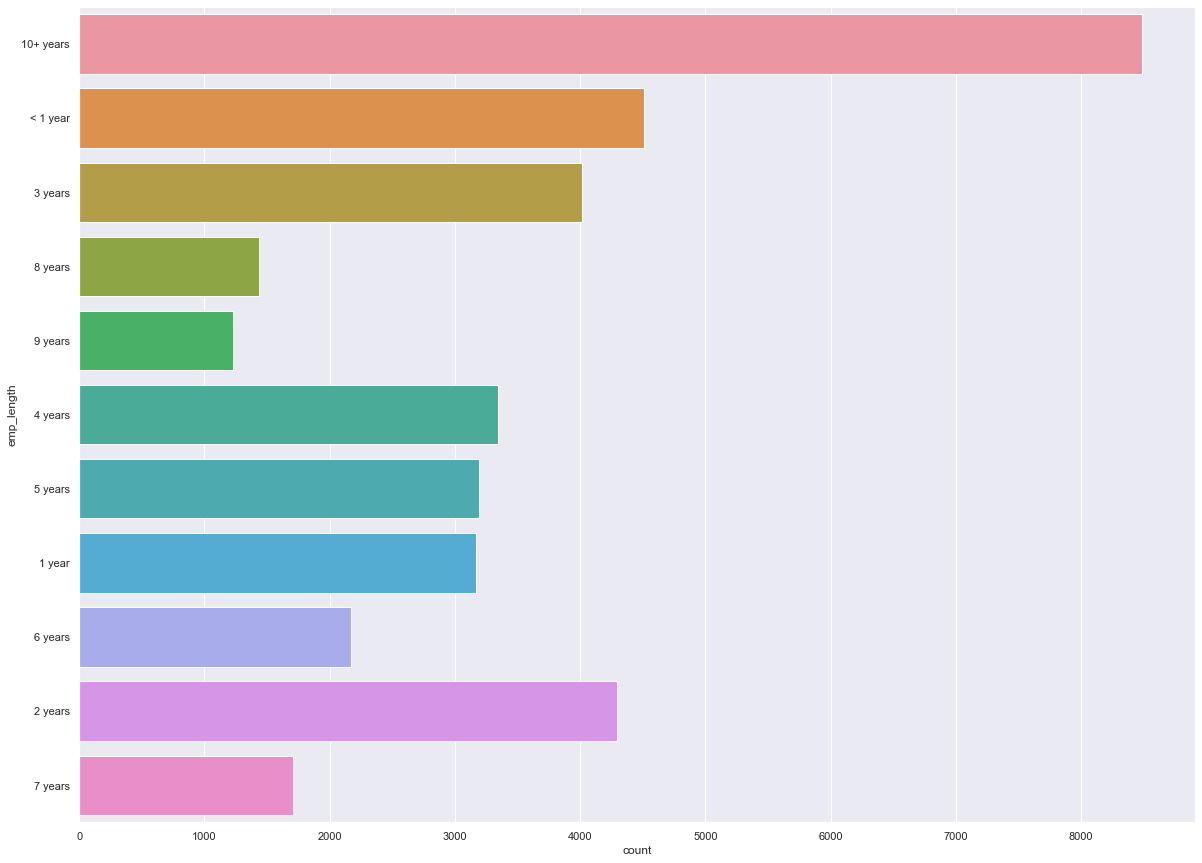

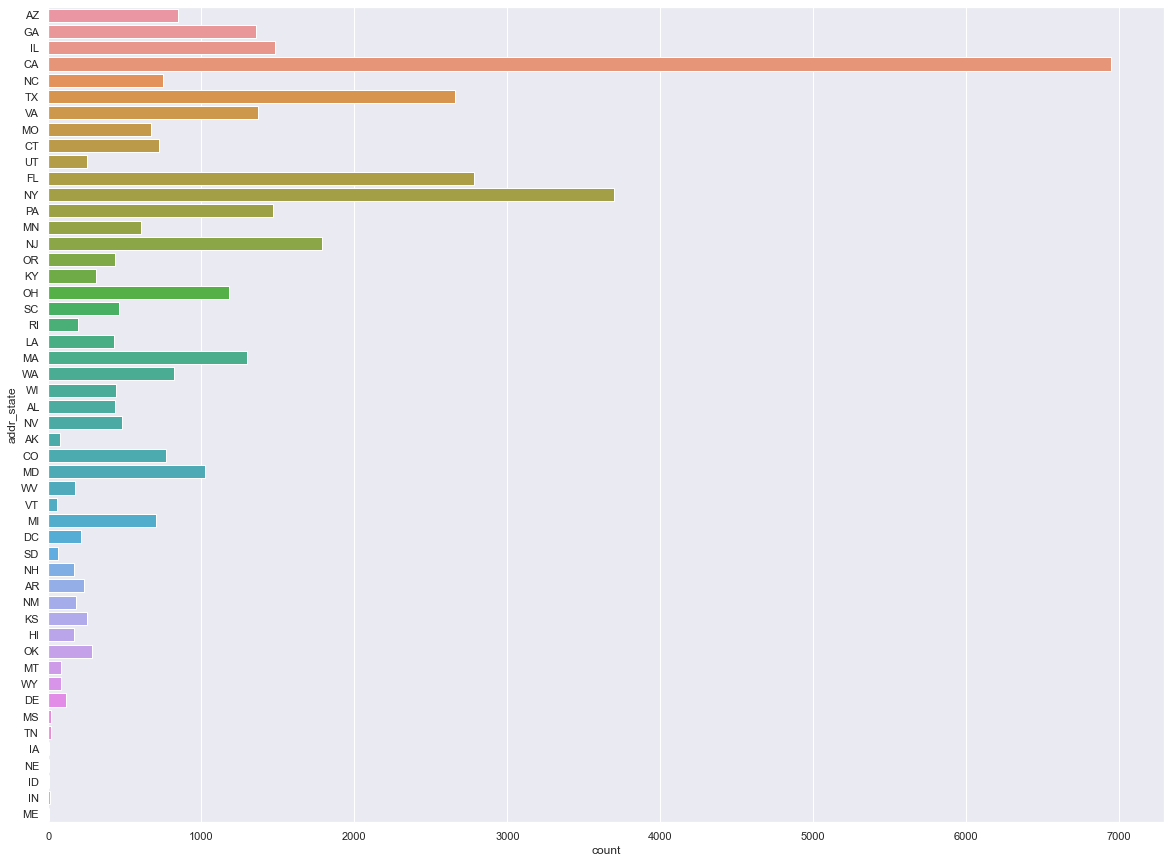

In [625]:
variables_to_analyze = ['home_ownership','grade','purpose','term','verification_status','emp_length', 'addr_state']

for i in range(len(variables_to_analyze)):
    sns.countplot(y = variables_to_analyze[i],data = df_for_analysis)
    sns.set(rc = {'figure.figsize':(20,15)})
    # Show the plot
    plt.show()

##### From this we can make the following conclusions:
        1. People staying at rented accomodations are taking maximum loans
        2. Higher grade of employees take more loans, led by grade B
        3. Debt consolidation is the most common reason provided for loans
        4. Most of the loans are taken for shorter terms of 36 months
        5. Most of the loans are provided to unverified sources
        6. There is no clear pattern for employee experience on number of loans but employees more than 10+ years experience take a lot of loans
        7. People from state of CA take maximum loans

##### Let's also check the highest number of chargeoffs occurs for which categorical values for each of these categories

In [ ]:
variables_to_analyze = ['home_ownership','grade','purpose','term','verification_status','emp_length','addr_state']

for i in range(len(variables_to_analyze)):
    sns.countplot(y = variables_to_analyze[i],hue = 'loan_status',data = df_for_analysis)
    sns.set(rc = {'figure.figsize':(20,15)})
    # Show the plot
    plt.show()


##### We can make the following inferences from this:
        1. Rental people cause maximum number of chargeoffs
        2. Higher grade employees have maximum number of chargeoffs
        3. Debt consolidation has most chargeoff
        4. Lower term have higher chargeoffs
        5. Verified and Unverified have equal chargeoffs
        6. 10+ years experience applicants have highest chargeoff
        7. State of CA has the maximum number of chargeoffs
    Now all these chargeoffs can be caused only by higher number of loans. It is important to find out the percentage of chargeoffs among all applications for a dimension value under a certain variable

##### Checking the highest number of chargeoffs is not enough. We need to check the highest percentage of chargeoffs happens for which categorical values within these categories as well, this will give a corerct judgement of the risks

In [ ]:
def chargeoff_probability_analysis (df_for_analysis, attribute_list):
    
    candidates = attribute_list
    for j in range(len(candidates)):
        dictionary = {}
        l = df_for_analysis[candidates[j]].unique()
        print('\n',candidates[j])
        for i in range(len(l)):
            dictionary[l[i]] = 100*len(df_for_analysis[(df_for_analysis[candidates[j]]==l[i]) & (df_for_analysis['loan_status']=='Charged Off')])/len(df_for_analysis[df_for_analysis[candidates[j]]==l[i]])

        property_status = list(dictionary.keys())
        values = list(dictionary.values())

        fig = plt.figure(figsize = (15, 10))

        # creating the bar plot
        plt.bar(property_status, values, color ='maroon',
                width = 0.4)

        plt.xlabel(candidates[j])
        plt.ylabel("Percentage of chargeoff")
        plt.title("Percentage of chargeoffs for different categories")
        plt.show()


 home_ownership


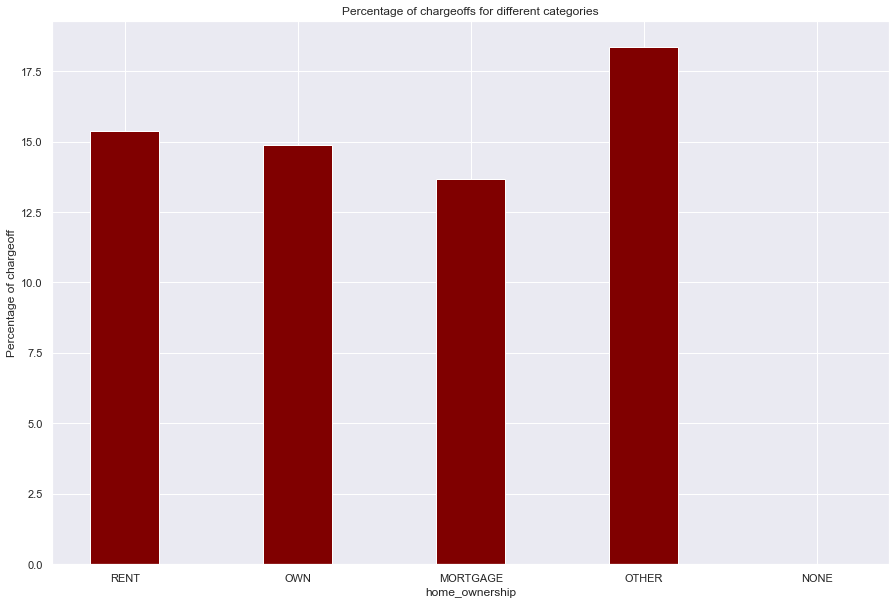


 grade


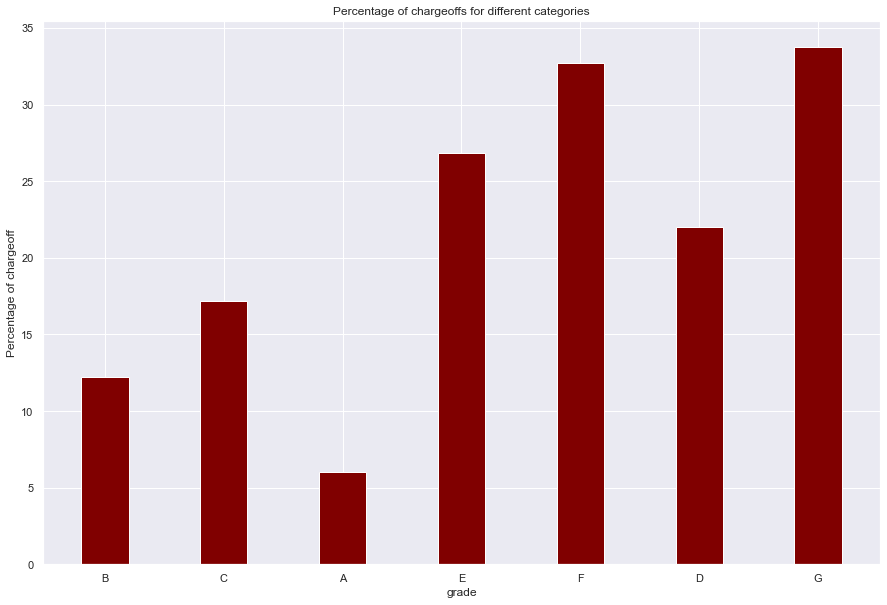


 purpose


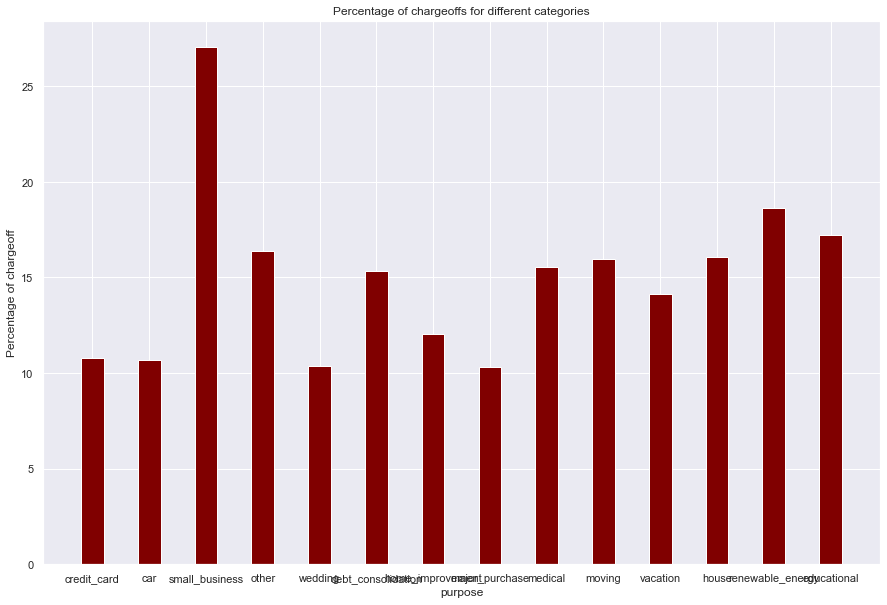


 term


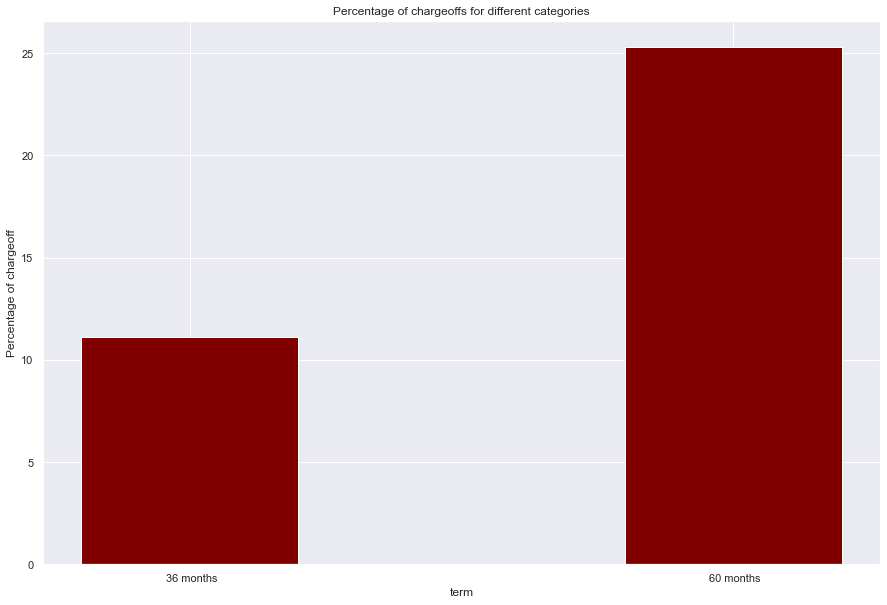


 verification_status


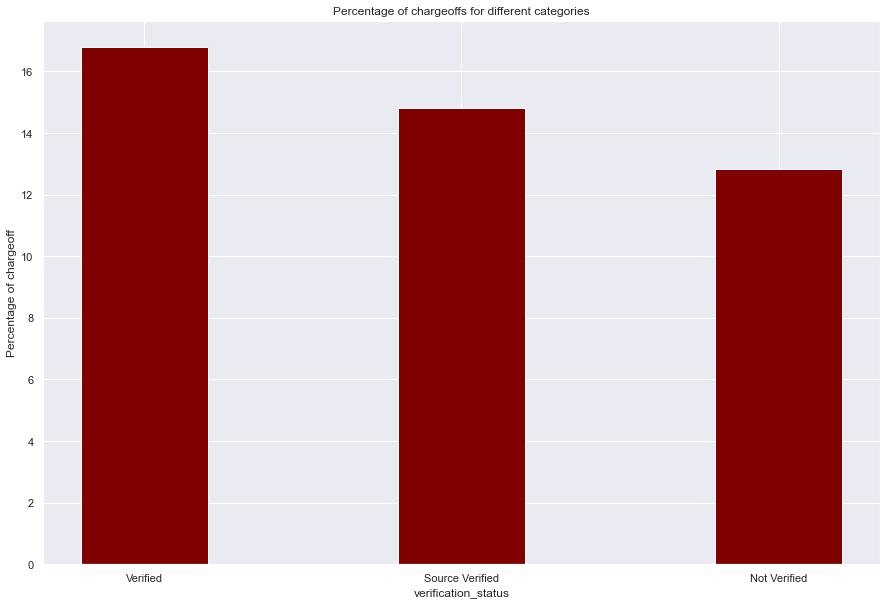


 addr_state


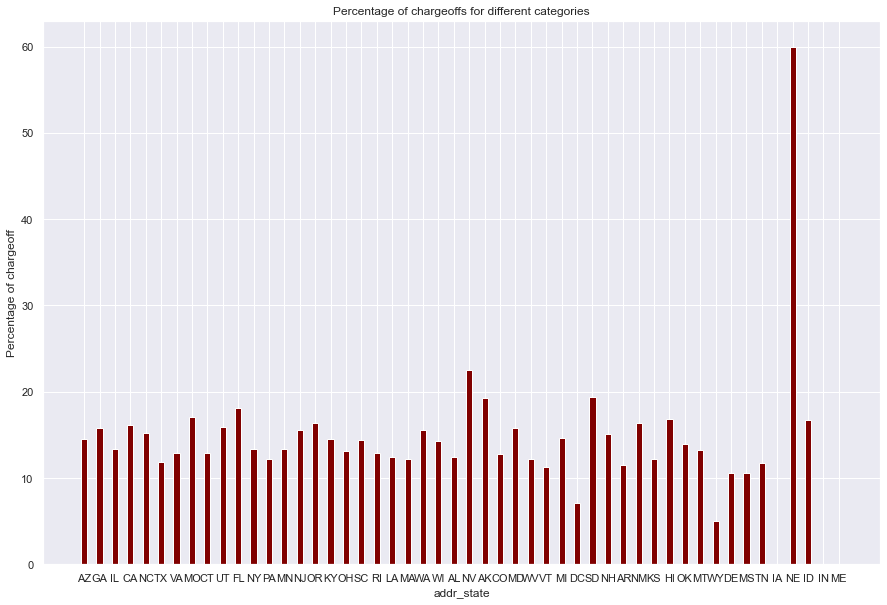

In [626]:
attribute_list = ['home_ownership','grade','purpose','term','verification_status','addr_state']
chargeoff_probability_analysis(df_for_analysis, attribute_list)

##### The story becomes much more clearer now. Following are the inferences that we can make:
        1. Rental candidates have higher probability of chargeoff. But the gap is not far from 'Own' and 'Mortgage'. Candidates who haven't mentioned about their home ownership have highest chargeoff probability. So making the candidates write their accomodation type becomes important
        2. As the grade of an employee lowers higher becomes the chargeoff percentage
        3. Small business has the highest amount of chargeoff probability
        4. Higher term means higher probability of chargeoff
        5. Verification does not seem to have any effect on reducing chargeoff probability
        6. State of NE has the highest chargeoff probability

In [627]:
#We will check the subgrades for 'E','F' and 'G' since the chargeoff is maximum for them, we can check how chargeoff vary with subgrades for them
# We are just trying out seaborn barplot here for experimenting
def chargeoff_probability_analysis_sns (df_for_analysis, attribute):
    candidates = attribute
    dictionary = {}
    l = df_for_analysis_lower_grades[candidates[0]].unique()
    print('\n','sub_grade')
    for i in range(len(l)):
        dictionary[l[i]] = 100*len(df_for_analysis[(df_for_analysis[candidates[0]]==l[i]) & (df_for_analysis['loan_status']=='Charged Off')])/len(df_for_analysis[df_for_analysis[candidates[0]]==l[i]])
    property_status = list(dictionary.keys())
    values = list(dictionary.values())
    df = pd.DataFrame(dictionary.items(), columns=['property_status', 'values'])
    df_sorted= df.sort_values('values')
    fig = plt.figure(figsize = (15, 10))
    sns.barplot(x='property_status', y="values", data=df_sorted)


 sub_grade


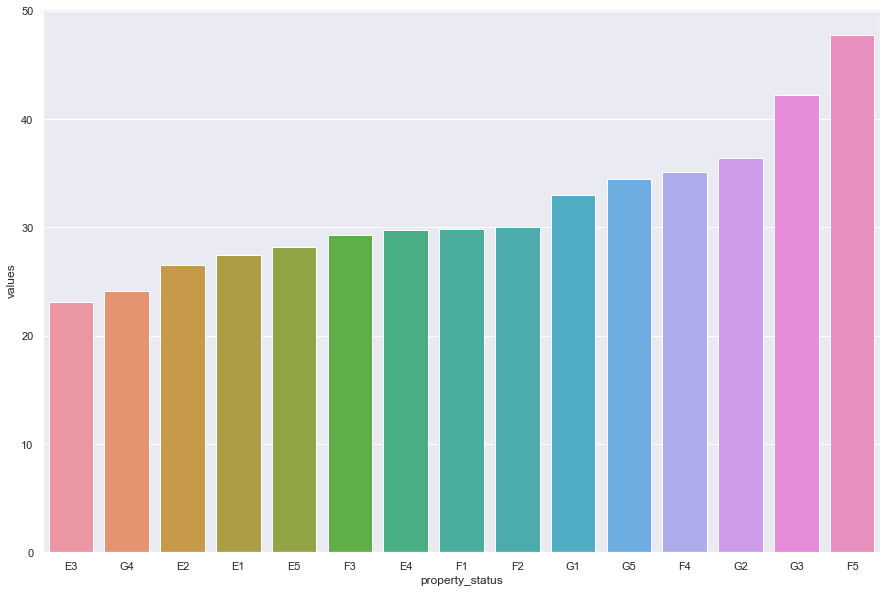

In [628]:
patterns = ['E','F','G']
patterns_string = '|'.join(patterns)
df_for_analysis_lower_grades = df_for_analysis[df_for_analysis['grade'].str.contains(patterns_string)]
attribute = ['sub_grade']
chargeoff_probability_analysis_sns(df_for_analysis, attribute)

##### Within lower grades as well as the sub grade lowers the chargeoff percentage increases

## Derived metrics analysis

##### Splitting the year into month and year to analyze them separately

In [629]:
df_for_analysis[['Month','Year']] = df_for_analysis['issue_d'].astype(str).str.split('-',expand = True)
df_for_analysis['Year'] = '20' + df_for_analysis['Year']

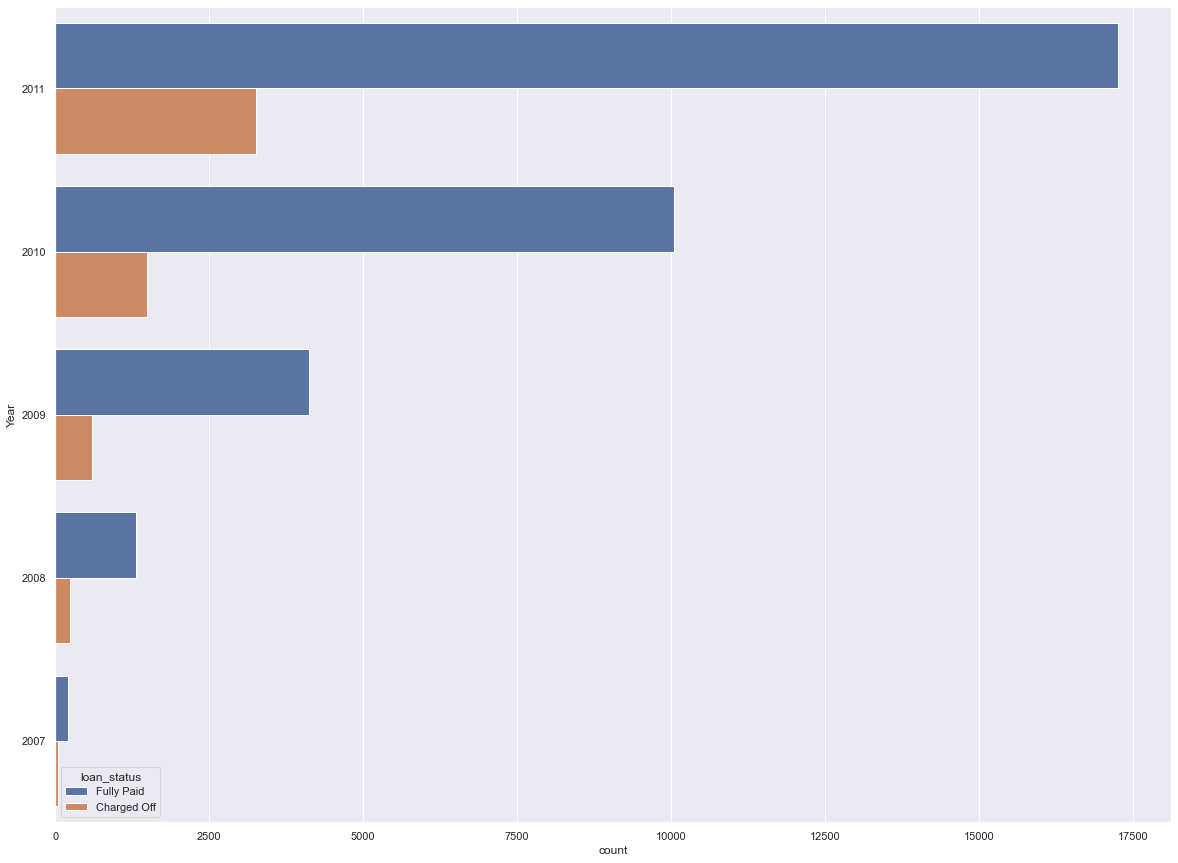

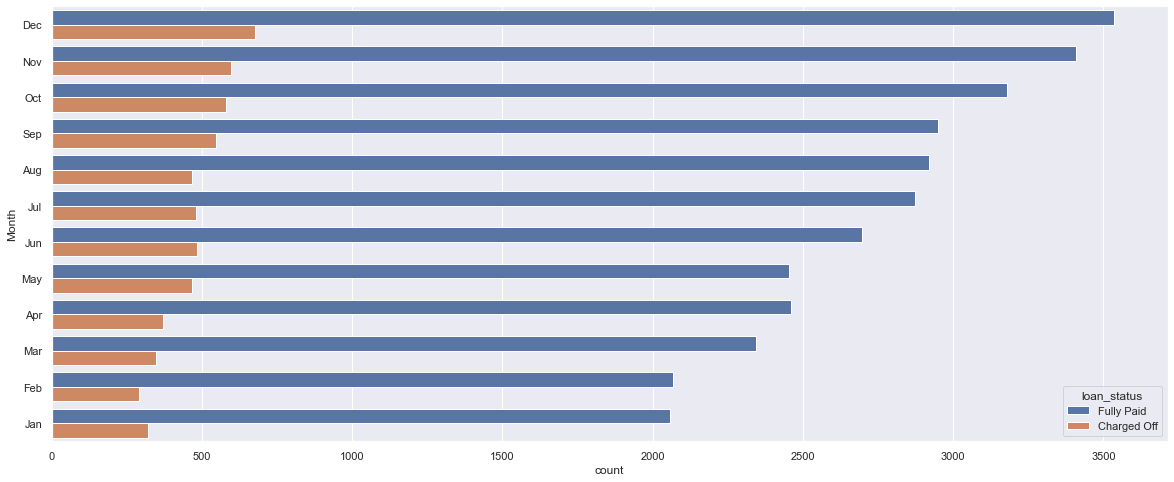

In [630]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

sns.countplot(y = 'Year',hue = 'loan_status',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

sns.countplot(y = 'Month',hue = 'loan_status',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

##### The amount of loans and number of chargeoffs increasefrom 2007 to 2011, more number of loans are being given now. The number of loans increases from month of January to December

##### Create bins for Loan amount, annual income and interest rate

In [631]:
# Creating bins here

# For Loan amount

bins = [0, 5000, 10000, 15000, 20000, 25000,40000]
slot = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000 and above']
df_for_analysis['loan_amnt_range'] = pd.cut(df_for_analysis['loan_amnt'], bins, labels=slot)

# For annual income

bins = [0, 25000, 50000, 75000, 100000,6000000]
slot = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000 and above']
df_for_analysis['annual_inc_range'] = pd.cut(df_for_analysis['annual_inc'], bins, labels=slot)

# # For interest rate
# df_for_analysis['int_rate'] = df_for_analysis['int_rate'].str[0:-1].astype(float)
bins = [0, 7.5, 10, 12.5, 15,20,25]
slot = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15-20', '20 and above']
df_for_analysis['int_rate_range'] = pd.cut(df_for_analysis['int_rate'], bins, labels=slot)

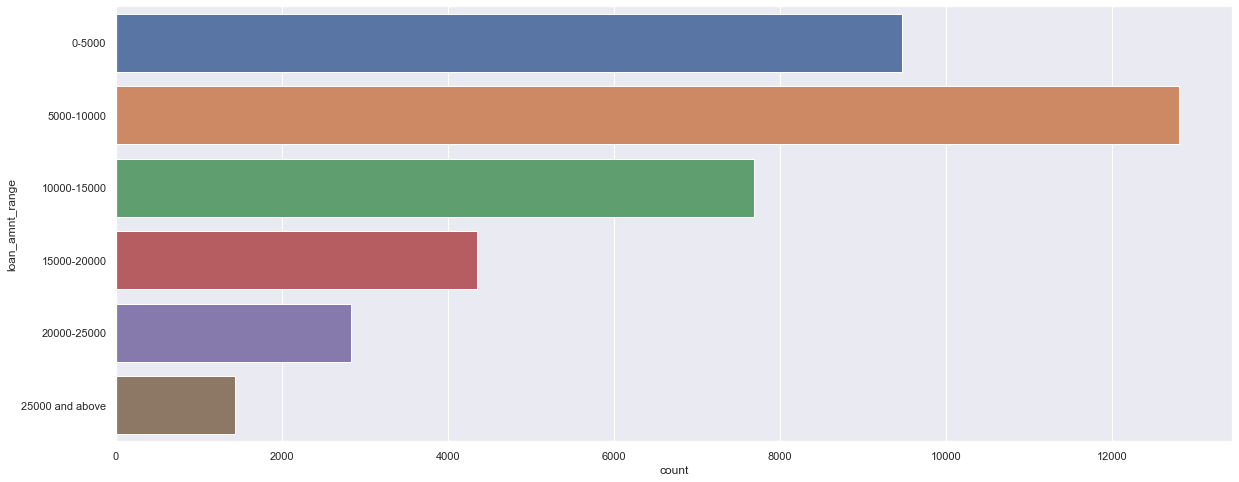

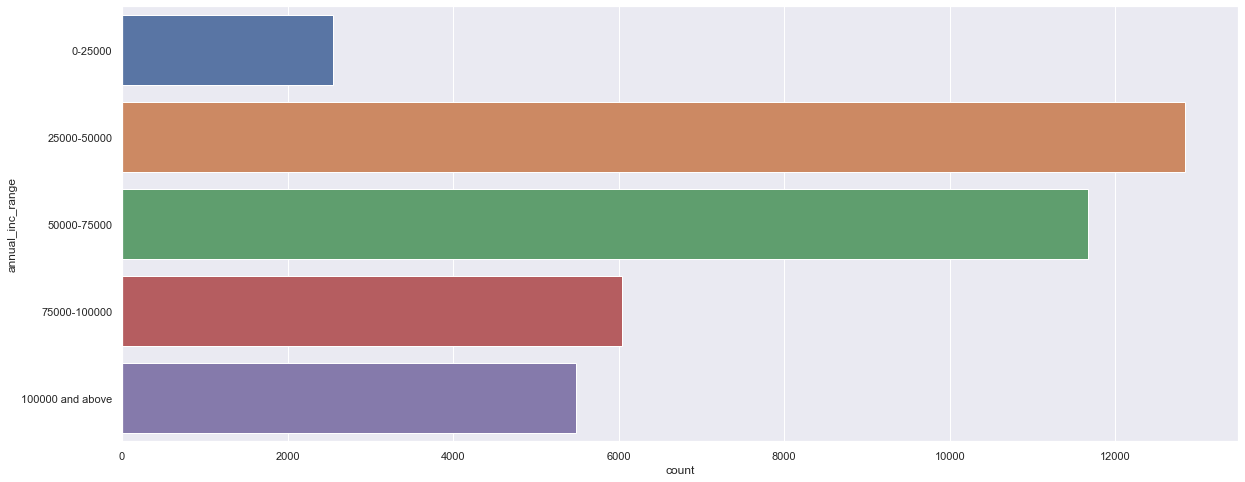

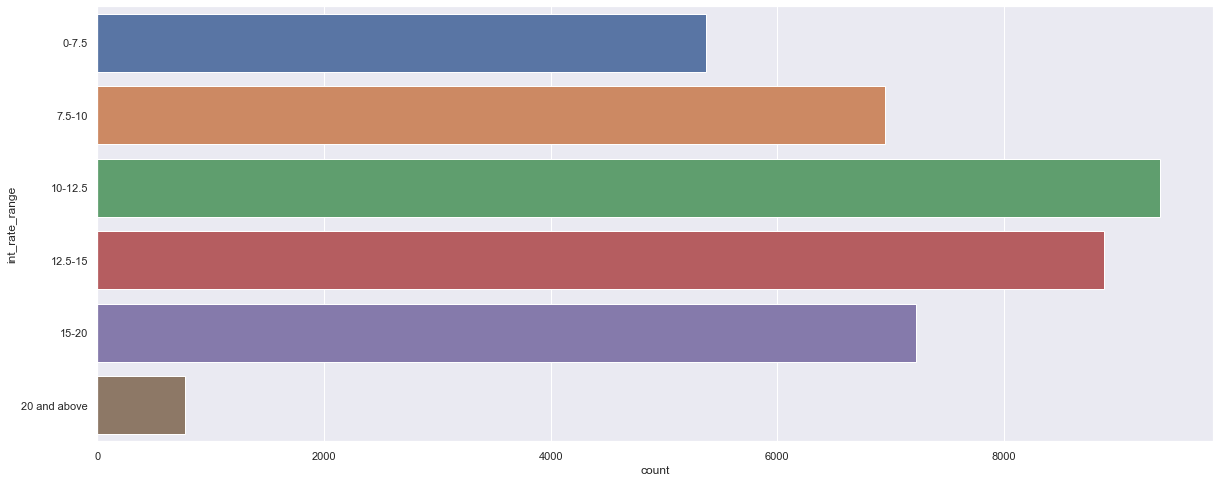

In [632]:
sns.countplot(y = 'loan_amnt_range',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

sns.countplot(y = 'annual_inc_range',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

sns.countplot(y = 'int_rate_range',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

##### Lower loan amounts are taken by more people, most of the people fall between income group 25-75k and the maximum number of loans are given between 10-15 pc range

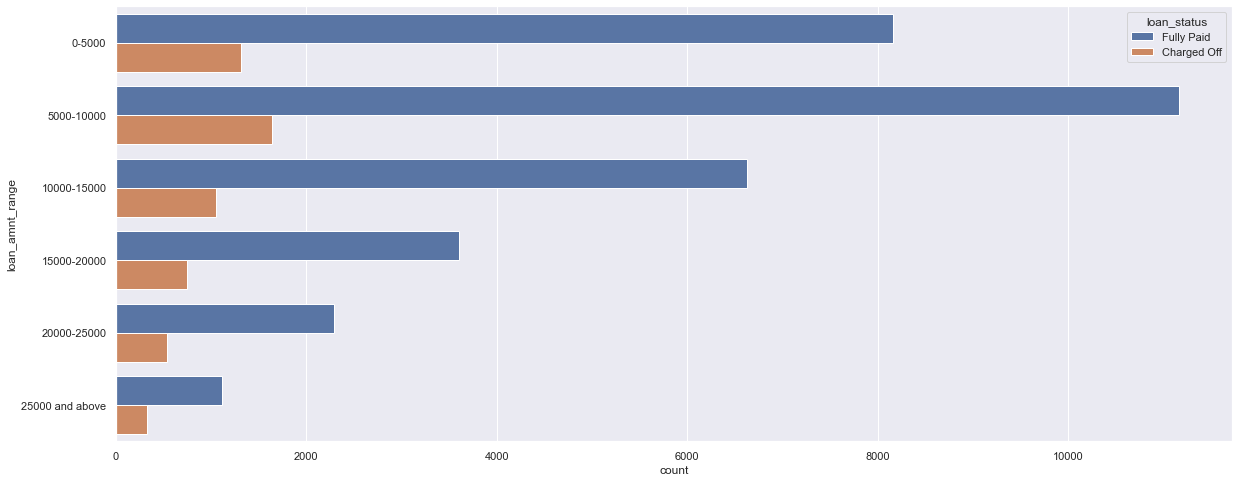

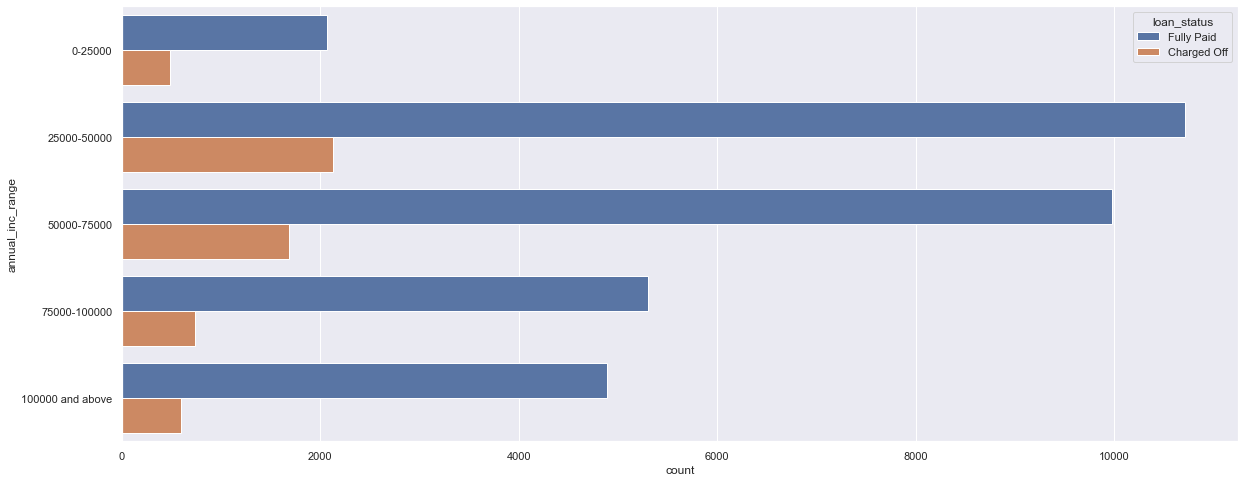

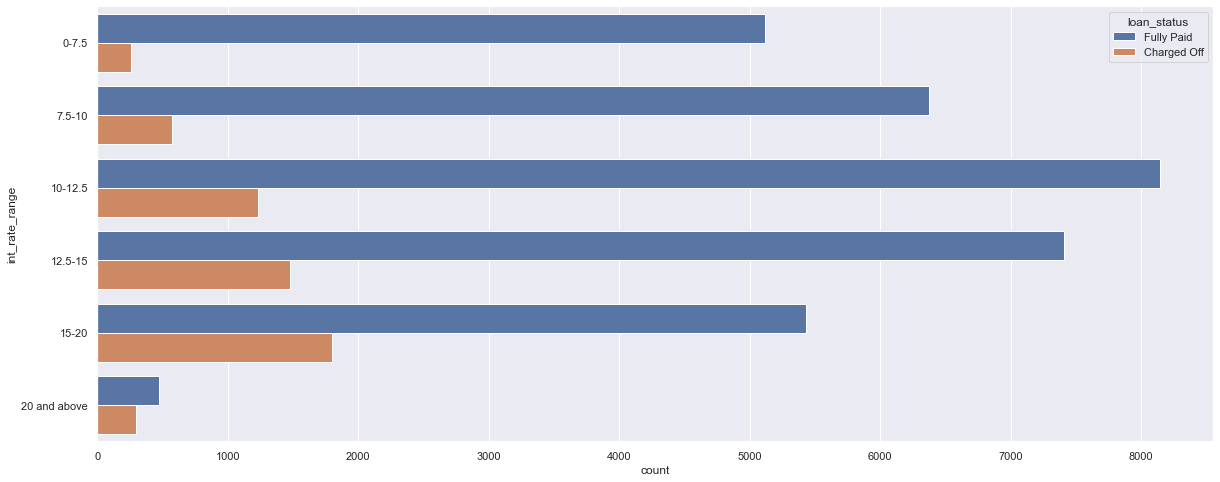

In [633]:
sns.countplot(y = 'loan_amnt_range',hue = 'loan_status',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

sns.countplot(y = 'annual_inc_range',hue = 'loan_status',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

sns.countplot(y = 'int_rate_range',hue = 'loan_status',data = df_for_analysis)
sns.set(rc = {'figure.figsize':(20,8)})
# Show the plot
plt.show()

##### Highest chargeoff is for applicants applying for lower loans, 25k-75k income group has maximum chargeoffs and 15-20 pc interest rate range have highest number of chargeoffs
As before knowing the number of chargeoffs is not enough. We should check the chargeoff probability as well


 loan_amnt_range


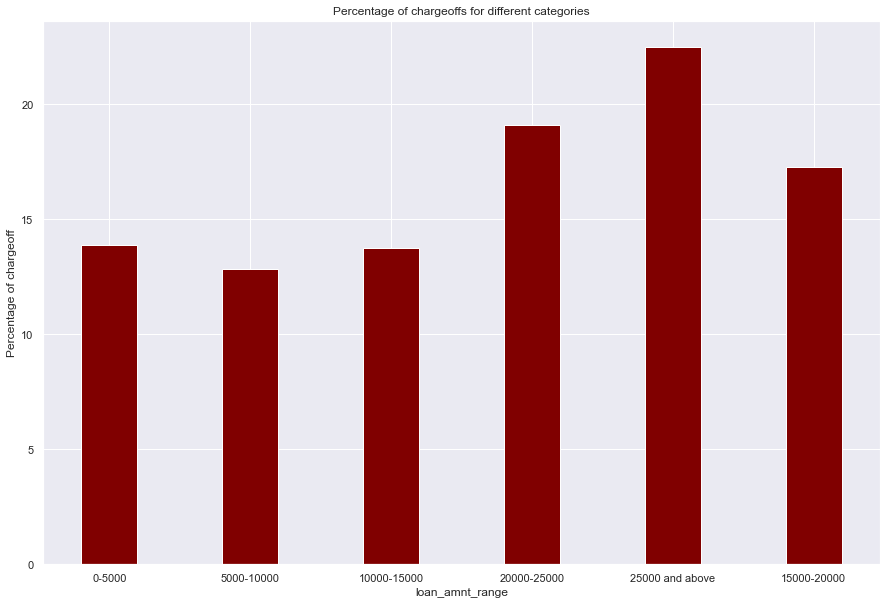


 annual_inc_range


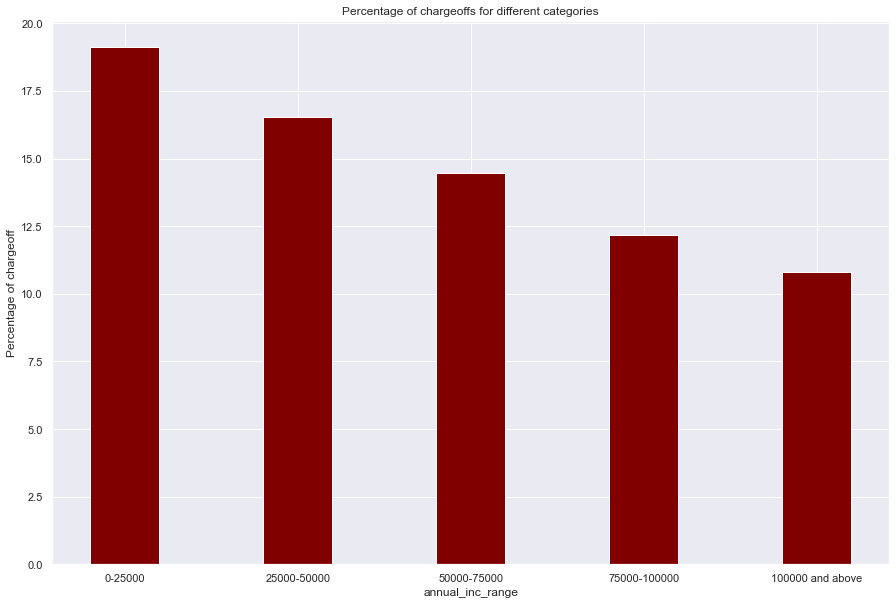


 int_rate_range


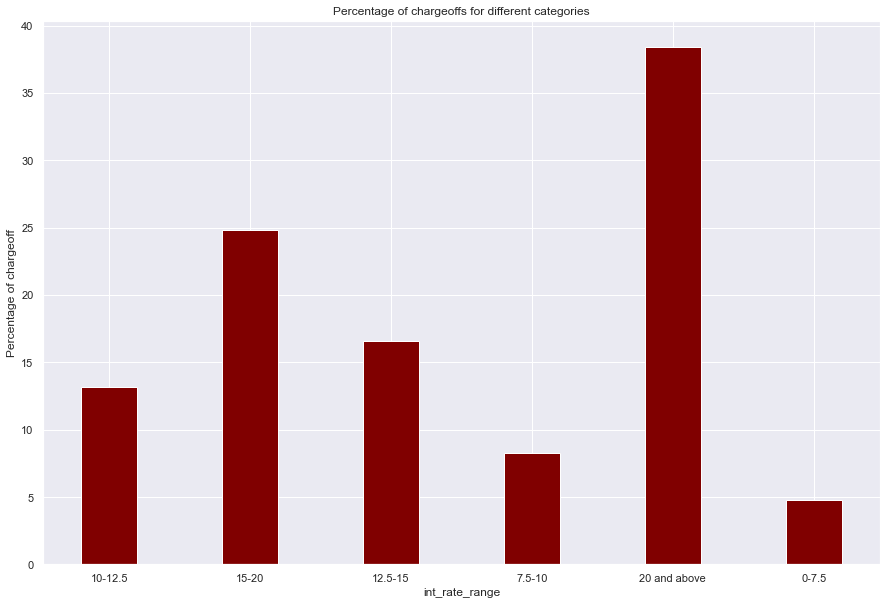


 Year


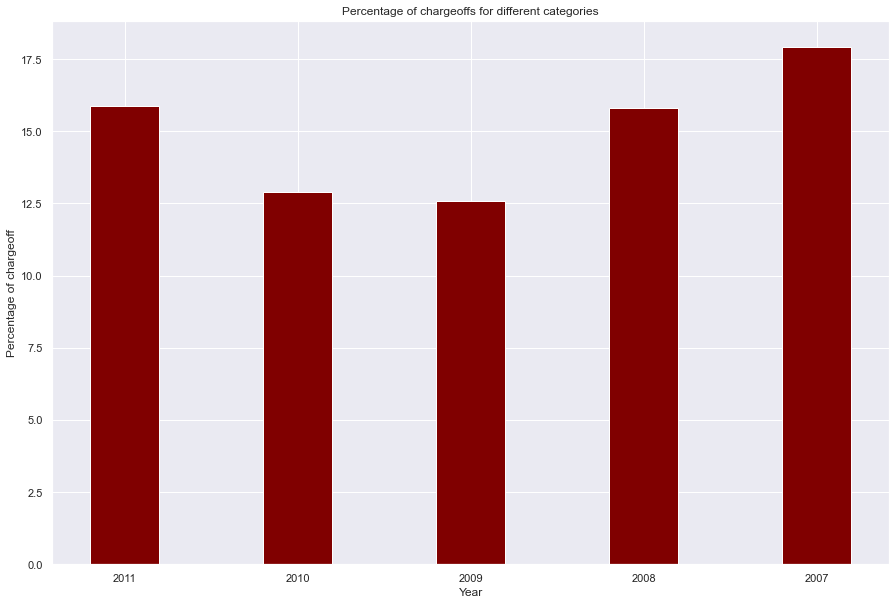


 Month


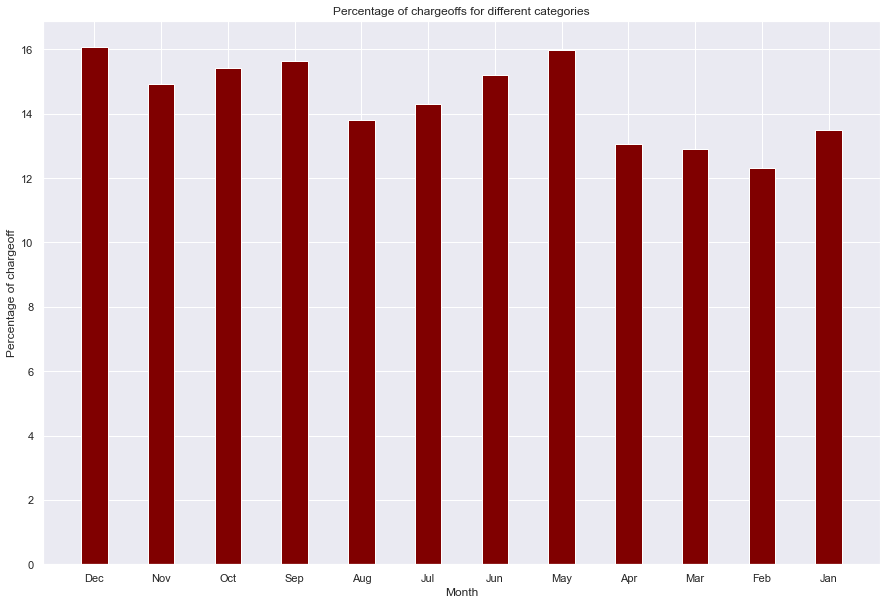

In [634]:
attribute_list = ['loan_amnt_range','annual_inc_range','int_rate_range','Year','Month']
chargeoff_probability_analysis(df_for_analysis, attribute_list)

##### Following are the inferences that we can make:
        1. Higher loans cause higher probability of chargeoffs. We saw from violin plot in earlier analysis that people were given loans after rounding off to nearest 5k, that should be avoided.
        2. Lower income group candidates cause higher probability of chargeoff
        3. Higher interest rate cause higher probability of chargeoff.
        4. The probability of chargeoffs is decreasing with progression of years
        5. December and May have highest probability of chargeoffs

In [635]:
#the emp_length gives an error because of the nan values

candidates = ['emp_length']
for j in range(len(candidates)):
    dictionary = {}
    l = df_for_analysis[candidates[j]].unique()
    print('\n',candidates[j])
    for i in range(len(l)):
        dictionary[l[i]] = 100*len(df_for_analysis[(df_for_analysis[candidates[j]]==l[i]) & (df_for_analysis['loan_status']=='Charged Off')])/len(df_for_analysis[df_for_analysis[candidates[j]]==l[i]])
#         print(l[i],100*len(df_for_analysis[(df_for_analysis[candidates[j]]==l[i]) & (df_for_analysis['loan_status']=='Charged Off')])/len(df_for_analysis[df_for_analysis[candidates[j]]==l[i]]))
    property_status = list(dictionary.keys())
    values = list(dictionary.values())

    fig = plt.figure(figsize = (15, 10))

    # creating the bar plot
    plt.bar(property_status, values, color ='maroon',
            width = 0.4)

    plt.xlabel("Categorical Variable")
    plt.ylabel("Percentage of chargeoff")
    plt.title("Percentage of chargeoffs for different categories")
    plt.show()


 emp_length


ZeroDivisionError: division by zero

In [636]:
df_for_analysis_emp_length_not_na = df_for_analysis[df_for_analysis['emp_length'].notna()]


 emp_length


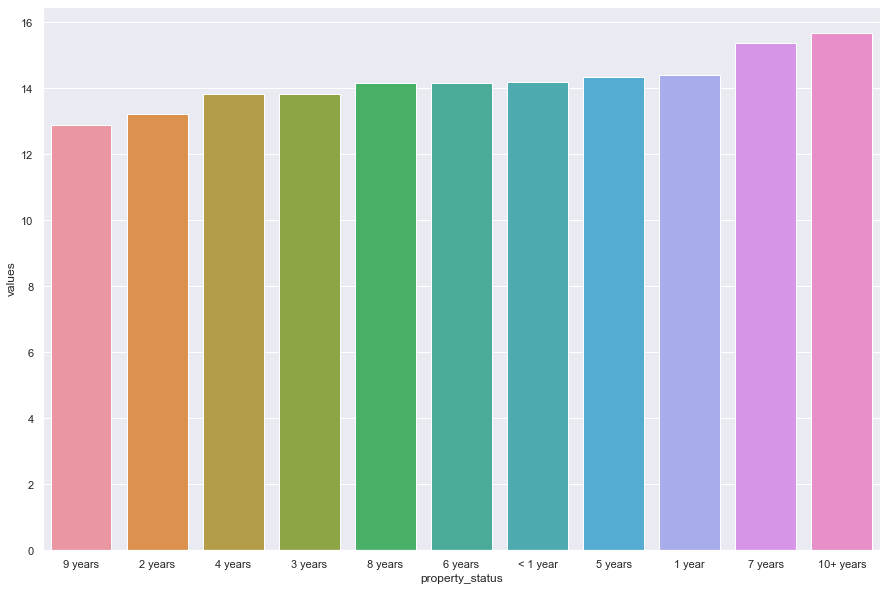

In [637]:
#the emp_length gives an error because of the nan values

candidates = ['emp_length']
for j in range(len(candidates)):
    dictionary = {}
    l = df_for_analysis_emp_length_not_na[candidates[j]].unique()
    print('\n',candidates[j])
    for i in range(len(l)):
        dictionary[l[i]] = 100*len(df_for_analysis_emp_length_not_na[(df_for_analysis_emp_length_not_na[candidates[j]]==l[i]) & (df_for_analysis_emp_length_not_na['loan_status']=='Charged Off')])/len(df_for_analysis_emp_length_not_na[df_for_analysis_emp_length_not_na[candidates[j]]==l[i]])
#         print(l[i],100*len(df_for_analysis[(df_for_analysis[candidates[j]]==l[i]) & (df_for_analysis['loan_status']=='Charged Off')])/len(df_for_analysis[df_for_analysis[candidates[j]]==l[i]]))
    property_status = list(dictionary.keys())
    values = list(dictionary.values())
    df = pd.DataFrame(dictionary.items(), columns=['property_status', 'values'])
    df_sorted= df.sort_values('values')
    fig = plt.figure(figsize = (15, 10))
    sns.barplot(x='property_status', y="values", data=df_sorted)

## Bivariate analysis for categorical and derived variables

##### Chargeoff probability is maximum for 10+ years experience people

In [638]:
## Convert numeric attributes to numbers for finding correlation matrix
numeric_columns = ['loan_amnt','funded_amnt','funded_amnt_inv','installment','int_rate','annual_inc','dti']

df_for_analysis[numeric_columns] = df_for_analysis[numeric_columns].apply(pd.to_numeric)

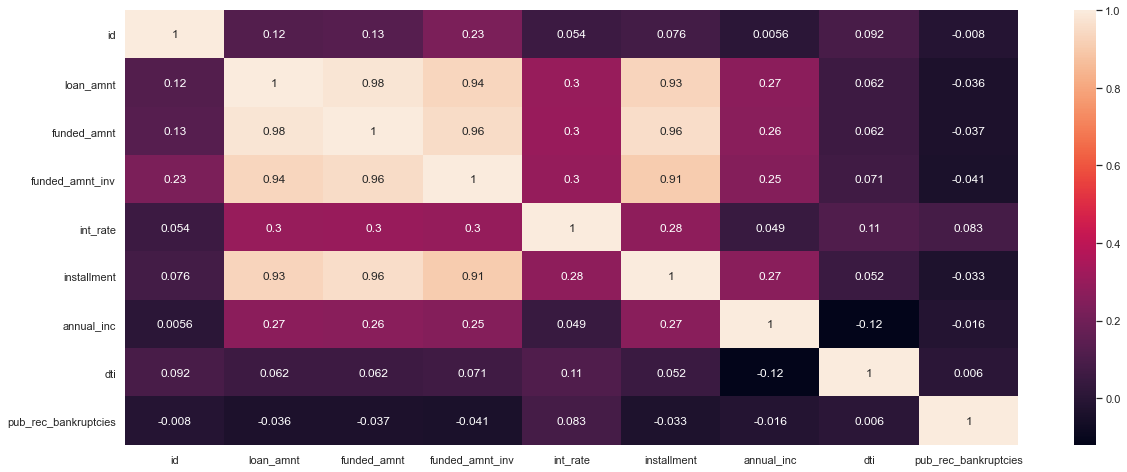

In [639]:
df_for_analysis_correlation = df_for_analysis.corr()
sns.heatmap(df_for_analysis_correlation, 
            xticklabels=df_for_analysis_correlation.columns.values,
            yticklabels=df_for_analysis_correlation.columns.values,annot= True)
plt.show()

##### It is clear from this that the continuous variables loan_amnt, funded_amnt and funded_amnt_inv and installment are highly correlated with each other and hence it is best to check univariate and bivariate relationships with only one measure out of them

##### We know that the lower grade of employement directly means higher chargeoff probability, but can we also check for which experience range of employees there is highest risk?

In [640]:
df_for_analysis_bivariate = df_for_analysis.loc[:,['id','emp_length','grade','loan_status']]

In [641]:
df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Charged Off','Charged_Off_Status'] = 1
df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Fully Paid','Charged_Off_Status'] = 0

In [642]:
df_for_analysis_bivariate

,id,emp_length,grade,loan_status,Charged_Off_Status
0,1077501,10+ years,B,Fully Paid,0.0
1,1077430,< 1 year,C,Charged Off,1.0
2,1077175,10+ years,C,Fully Paid,0.0
3,1076863,10+ years,C,Fully Paid,0.0
5,1075269,3 years,A,Fully Paid,0.0
...,...,...,...,...,...
39712,92187,4 years,A,Fully Paid,0.0
39713,90665,3 years,C,Fully Paid,0.0
39714,90395,< 1 year,A,Fully Paid,0.0
39715,90376,< 1 year,A,Fully Paid,0.0


In [643]:
df_for_analysis_grouped = df_for_analysis_bivariate.groupby(["emp_length", "grade"], as_index=False)["Charged_Off_Status"].sum()

In [644]:
df_for_analysis_grouped

,emp_length,grade,Charged_Off_Status
0,1 year,A,49.0
1,1 year,B,127.0
2,1 year,C,106.0
3,1 year,D,89.0
4,1 year,E,47.0
...,...,...,...
72,< 1 year,C,163.0
73,< 1 year,D,125.0
74,< 1 year,E,80.0
75,< 1 year,F,23.0


In [645]:
df_pivoted = df_for_analysis_grouped.pivot(index='emp_length', columns='grade', values='Charged_Off_Status')
df_pivoted

grade,A,B,C,D,E,F,G
emp_length,,,,,,,
1 year,49.0,127.0,106.0,89.0,47.0,26.0,12.0
10+ years,142.0,318.0,304.0,274.0,171.0,94.0,28.0
2 years,50.0,150.0,135.0,115.0,82.0,30.0,5.0
3 years,56.0,127.0,139.0,122.0,70.0,27.0,14.0
4 years,44.0,121.0,97.0,94.0,64.0,32.0,10.0
5 years,50.0,116.0,110.0,90.0,58.0,27.0,7.0
6 years,28.0,76.0,79.0,62.0,41.0,16.0,5.0
7 years,19.0,74.0,69.0,41.0,36.0,20.0,4.0
8 years,21.0,55.0,46.0,42.0,28.0,8.0,3.0


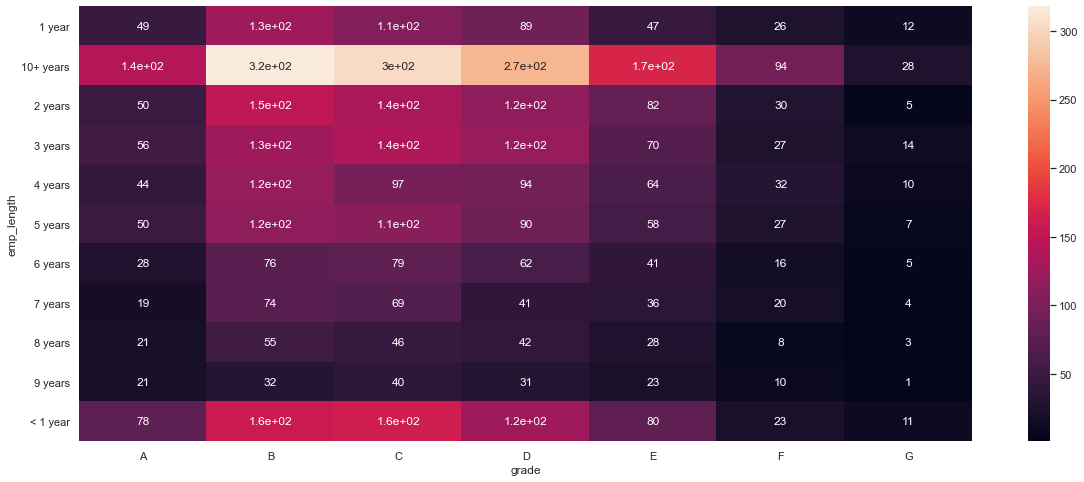

In [646]:
# This will show chargeoff count comparison between employee length and grade
ax = sns.heatmap(df_pivoted,annot=True)

In [650]:
df1 = df_for_analysis_bivariate.loc[df_for_analysis_bivariate['Charged_Off_Status']==1].groupby(["emp_length", "grade"], as_index=False)['id'].count()
df2 = df_for_analysis_bivariate.groupby(["emp_length", "grade"], as_index=False)['id'].count()
df3 = pd.merge(df1,df2, how = 'inner', on= ['emp_length','grade'],sort=False)
df3['Charged_off_pc'] = 100*df3['id_x']/df3['id_y']
df4 = df3.loc[:,['emp_length','grade','Charged_off_pc']]


In [648]:
df_pivoted_pc = df4.pivot(index='emp_length', columns='grade', values='Charged_off_pc')
#df_pivoted_pc

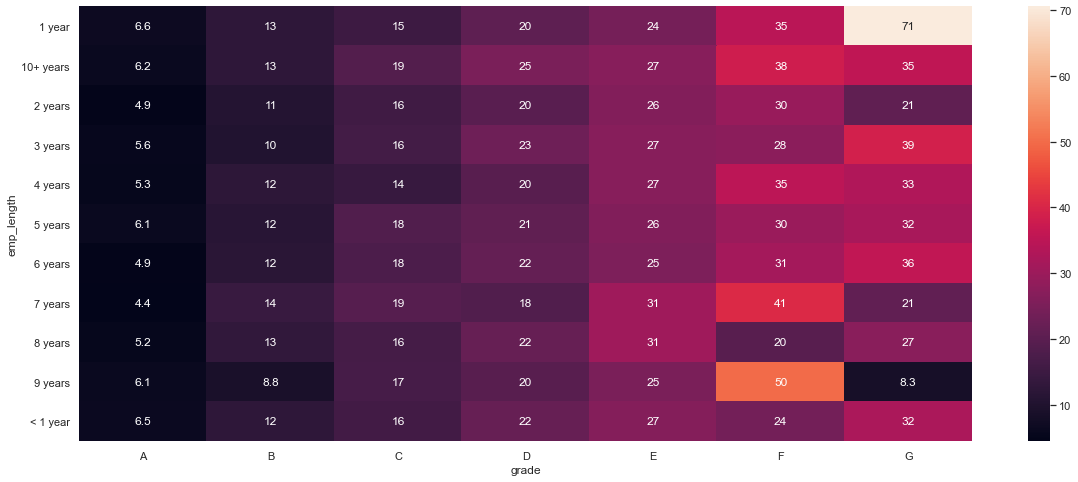

In [649]:
# This will show chargeoff probability percentage between employee length and grade
ax = sns.heatmap(df_pivoted_pc,annot=True)

##### There are few insights that we can take out from this, applicants with grade F and with higher experience tend to chargeoff more. Also applicants with employee grade G and lesser experience have higher chargeoff probability (particularly grade G employees with 1 year experience have very high chargeoff probability)

##### We have seen that people with verified status have higher chargeoffs, which seems a bit odd, can we check for which grade and experience of employees the maximum chargeoff with  verified status is happening?

In [651]:
#Creating a new function for generic heatmap analysis

def bivariate_analysis_heatmap_chargeoff_counts(df_for_analysis, comparison_attributes):
    df_for_analysis_bivariate = df_for_analysis.loc[:,['id',comparison_attributes[0],comparison_attributes[1],'loan_status']]
    df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Charged Off','Charged_Off_Status'] = 1
    df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Fully Paid','Charged_Off_Status'] = 0
    df_for_analysis_grouped = df_for_analysis_bivariate.groupby([comparison_attributes[0], comparison_attributes[1]], as_index=False)["Charged_Off_Status"].sum()
    df_pivoted = df_for_analysis_grouped.pivot(index=comparison_attributes[0], columns=comparison_attributes[1], values='Charged_Off_Status')
    ax = sns.heatmap(df_pivoted,annot=True)

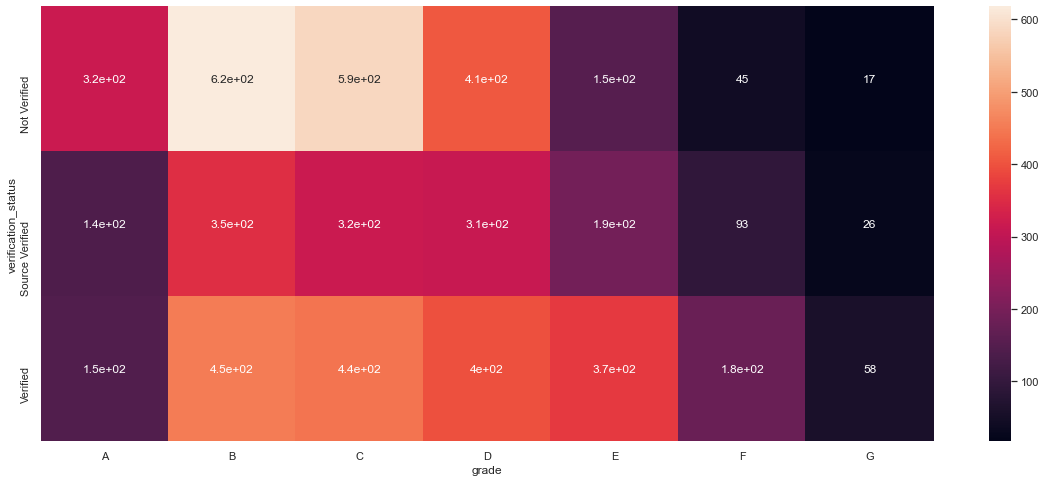

In [652]:
# Gives chargeoff counts between verification status and grade
comparison_attributes = ['verification_status','grade']
bivariate_analysis_heatmap_chargeoff_counts(df_for_analysis,comparison_attributes)

In [653]:
#Creating a function for generic heatmap analysis between two categorical variables and chargeoff probability
def bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis, comparison_attributes):
    
    df_for_analysis_bivariate = df_for_analysis.loc[:,['id',comparison_attributes[0],comparison_attributes[1],'loan_status']]
    df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Charged Off','Charged_Off_Status'] = 1
    df_for_analysis_bivariate.loc[df_for_analysis_bivariate['loan_status']=='Fully Paid','Charged_Off_Status'] = 0
    df1 = df_for_analysis_bivariate.loc[df_for_analysis_bivariate['Charged_Off_Status']==1].groupby([comparison_attributes[0], comparison_attributes[1]], as_index=False)['id'].count()
    df2 = df_for_analysis_bivariate.groupby([comparison_attributes[0], comparison_attributes[1]], as_index=False)['id'].count()
    df3 = pd.merge(df1,df2, how = 'inner', on= [comparison_attributes[0], comparison_attributes[1]],sort=False)
    df3['Charged_off_pc'] = 100*df3['id_x']/df3['id_y']
    df4 = df3.loc[:,[comparison_attributes[0], comparison_attributes[1],'Charged_off_pc']]
    df_pivoted_pc = df4.pivot(index=comparison_attributes[0], columns=comparison_attributes[1], values='Charged_off_pc')
    ax = sns.heatmap(df_pivoted_pc,annot=True)

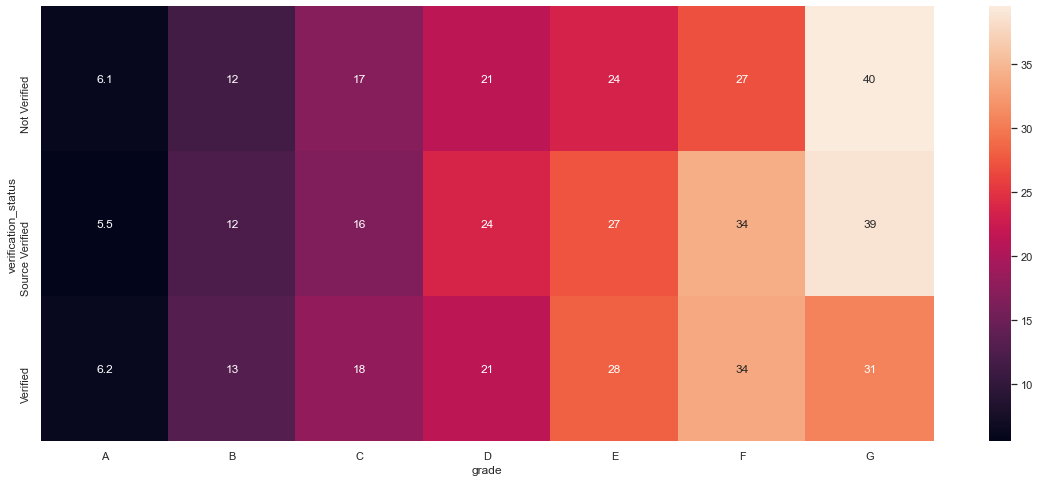

In [654]:
# Gives chargeoff probability percentage between verification status and grade
comparison_attributes = ['verification_status','grade']
bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis,comparison_attributes)

##### Verification for employees for all grades except level G does not bring the chargeoff probability down

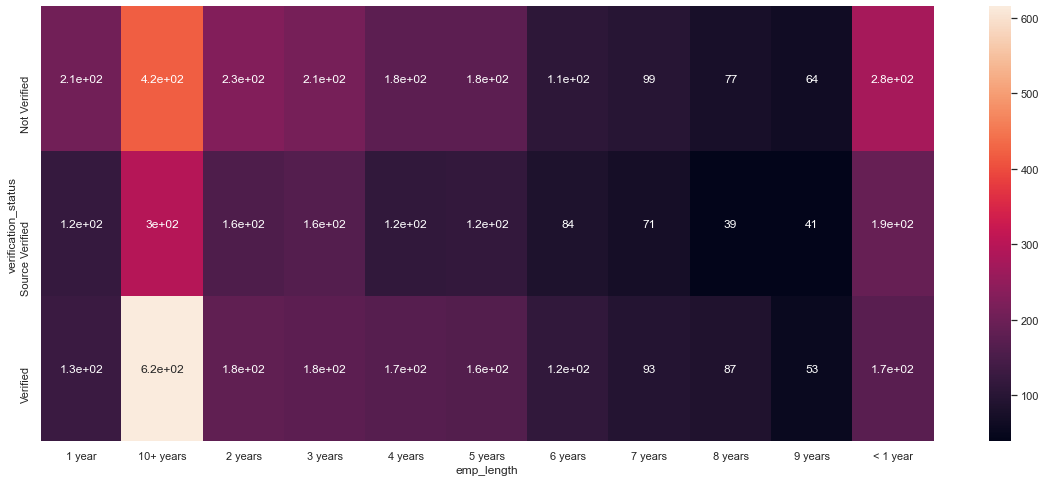

In [655]:
#Gives chargeoff counts between verification status and employee length
comparison_attributes = ['verification_status','emp_length']
bivariate_analysis_heatmap_chargeoff_counts(df_for_analysis,comparison_attributes)

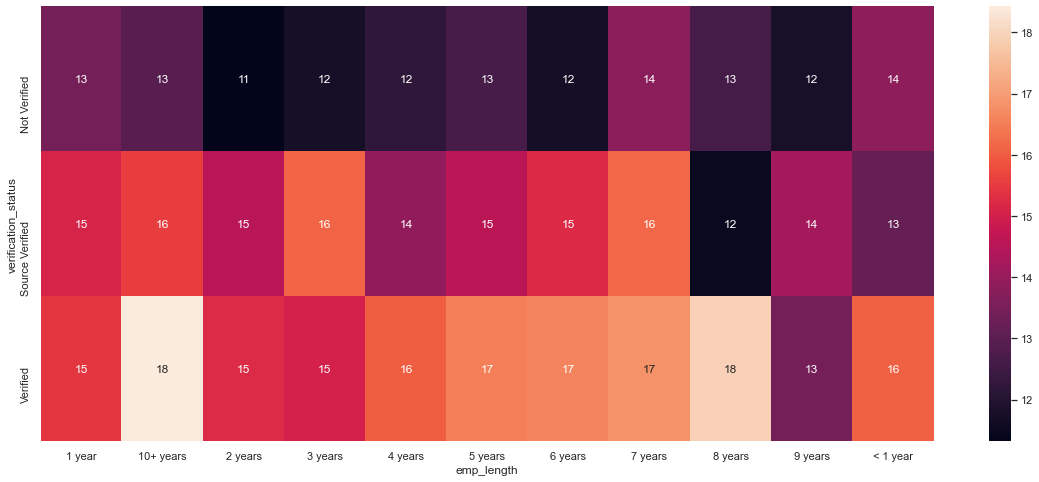

In [656]:
# Gives probability of chargeoff between verification status and employee length
comparison_attributes = ['verification_status','emp_length']
bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis,comparison_attributes)

##### Verified applicants do not bring the chargeoff probability for all experience of employees

##### For purpose we have seen that 'Debt Consolidation' is an in-demand purpose for which maximum loans are taken. Small Business is one category where maximum chargeoffs happen. Can we see for both these purposes for which variables investors can go in for investing or lending club can look for providing loans in future?


 grade


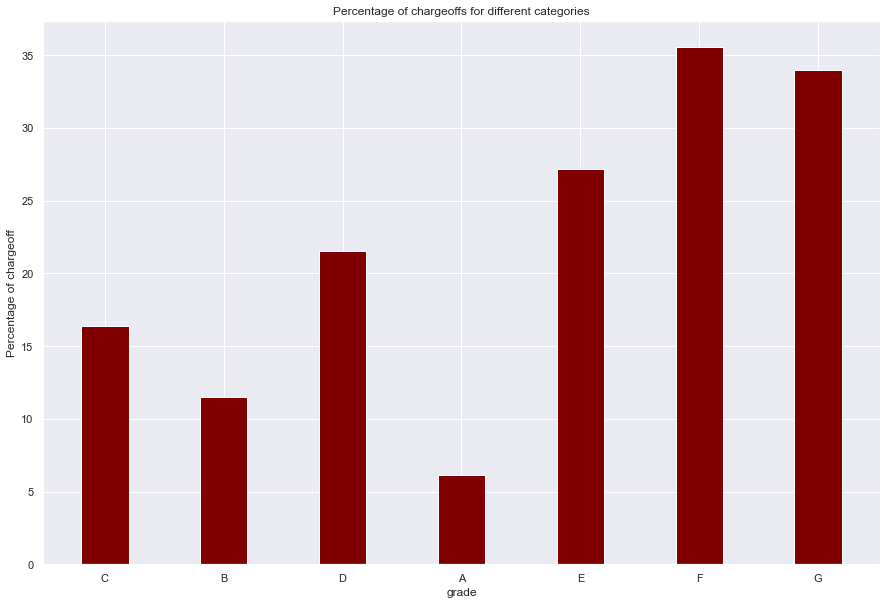


 term


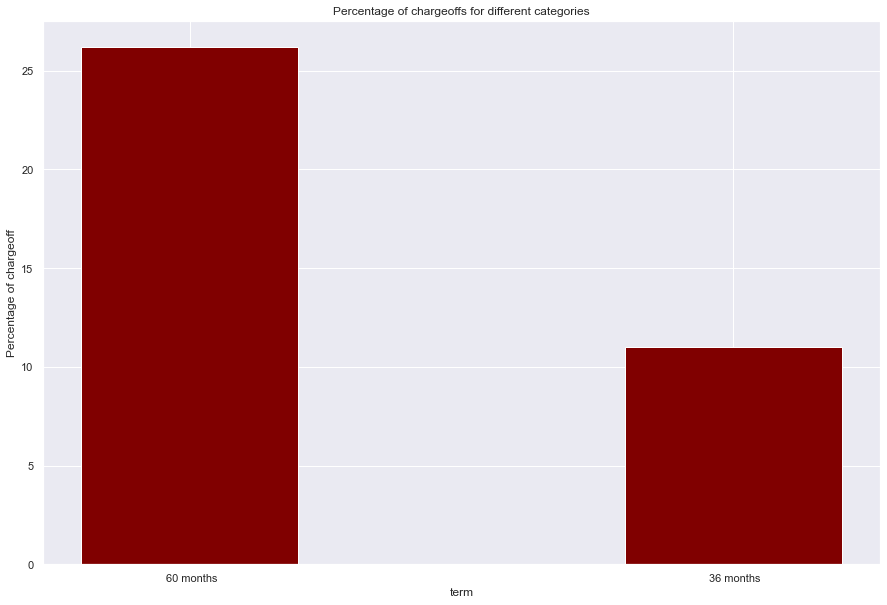


 emp_length


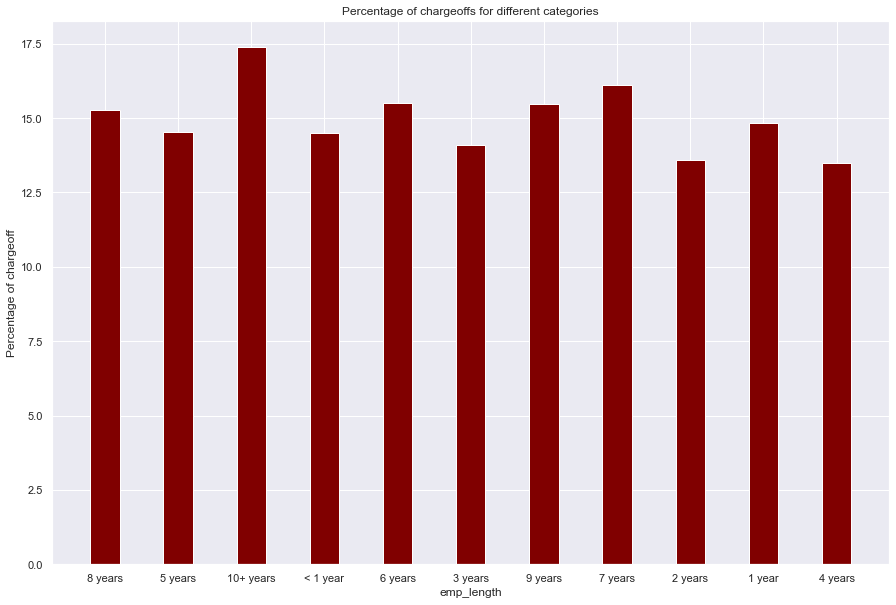


 loan_amnt_range


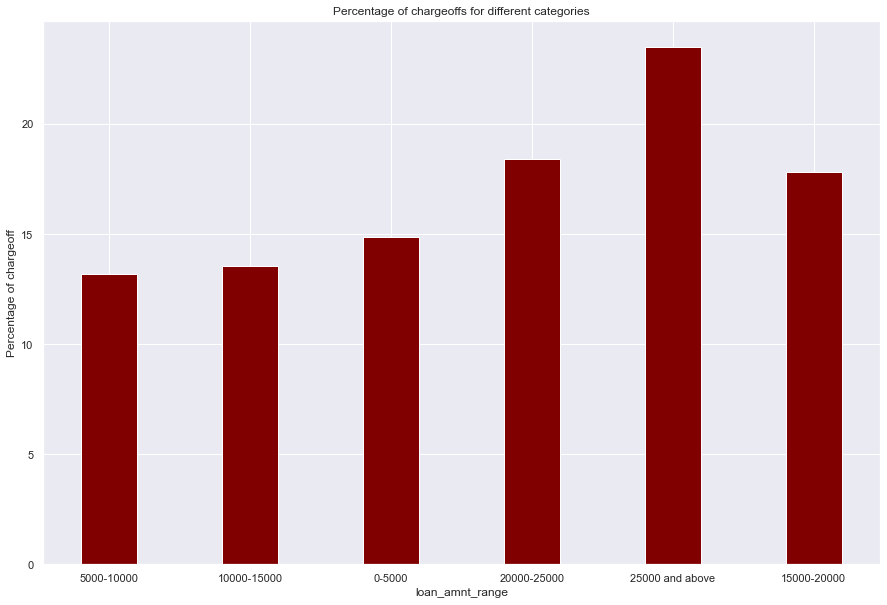


 annual_inc_range


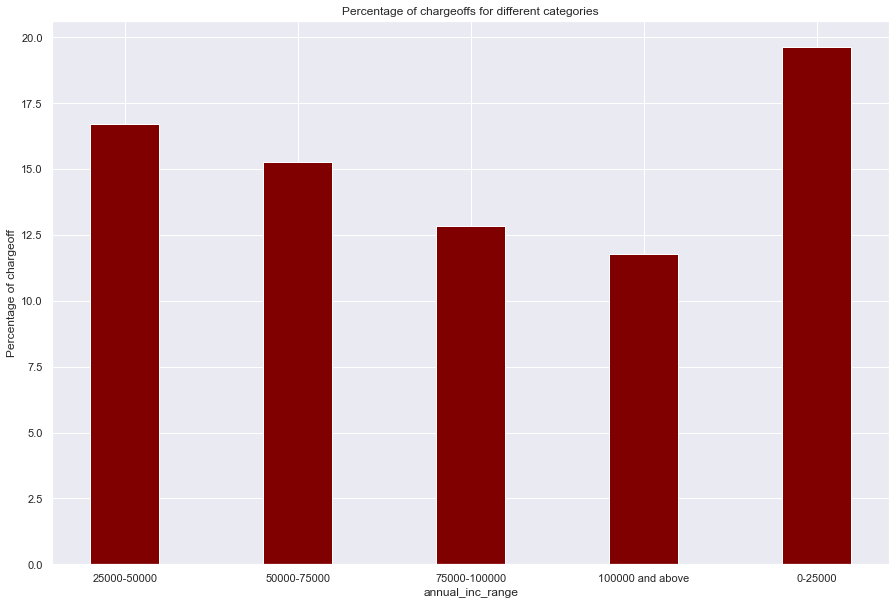


 int_rate_range


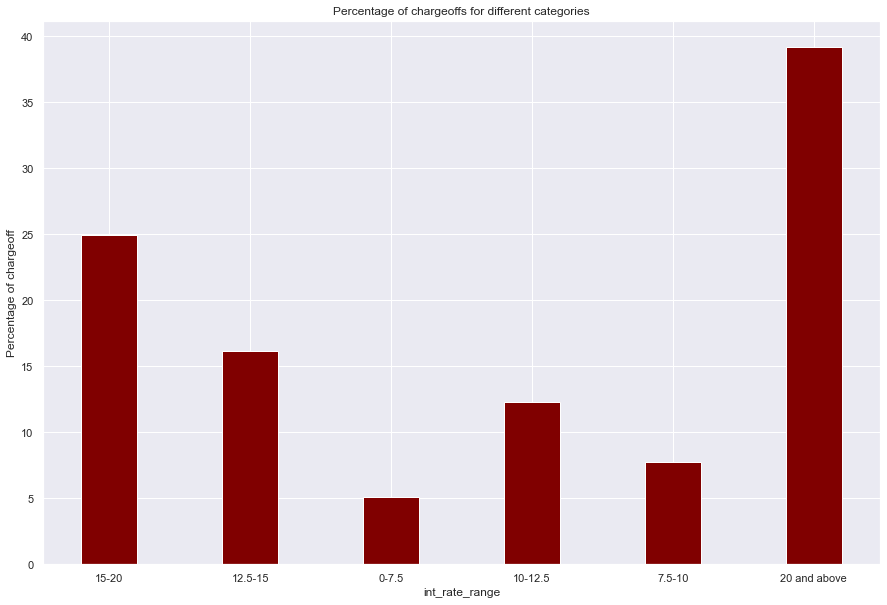

In [657]:
df_for_analysis_debt_consolidation = df_for_analysis_emp_length_not_na.loc[(df_for_analysis['purpose']=='debt_consolidation')]
attribute_list = ['grade','term','emp_length','loan_amnt_range','annual_inc_range','int_rate_range']
chargeoff_probability_analysis(df_for_analysis_debt_consolidation, attribute_list)

##### Debt consolidation is the most popular purpose of taking a loan among the candidates. To make maximum profit and reduce chargeoffs following are the people that the company can target and attract investors as well:
        1. Loans to grade F employees is discouraged since they have highest chargeoff
        2. Encourage it among lower experienced candidates (1-3 years)
        3. Since there is no difference in chargeoff probability between 20k-25k and 15k-20k people coming for 15-20k loans can be offered 20-25k loans as well
        4. Avoid giving debt consolidation loan to lower income group
        5. Avoid giving these loans at 20 and above pc interest rate since the chargeoff probability is really high. If higher interest rate has to be provided then limit it below 20


 grade


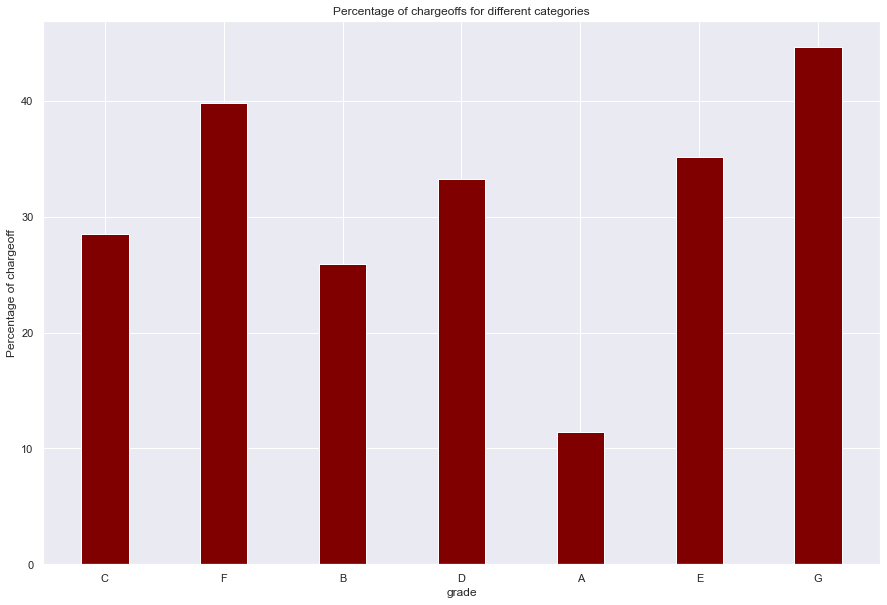


 term


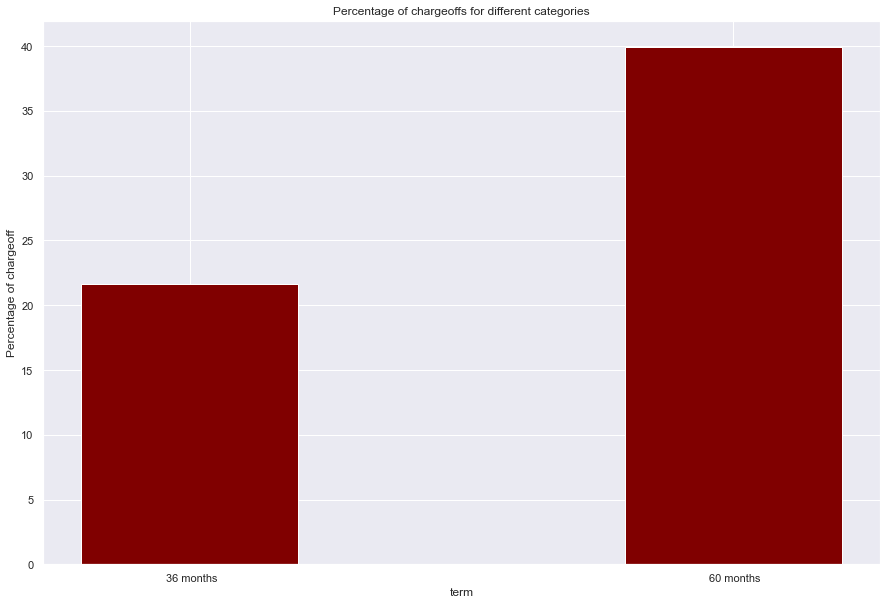


 emp_length


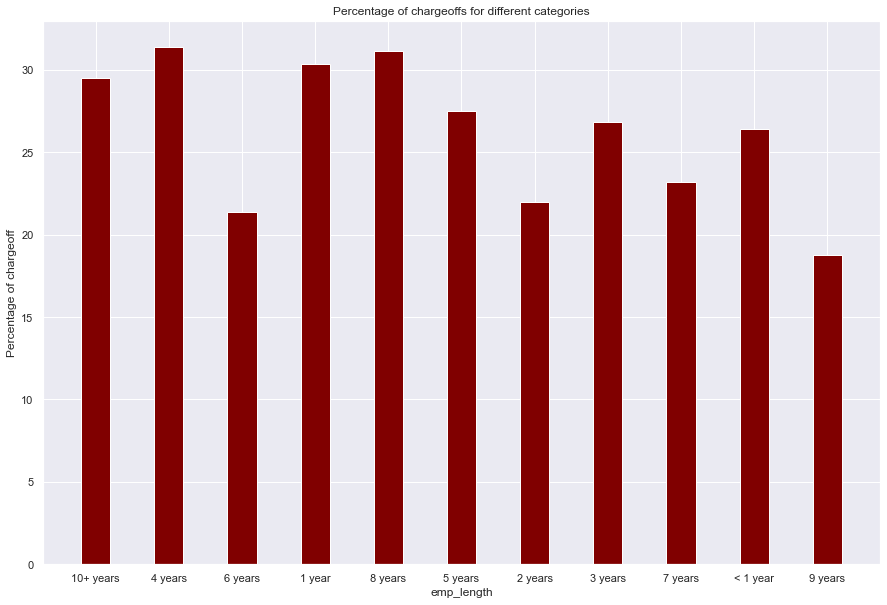


 loan_amnt_range


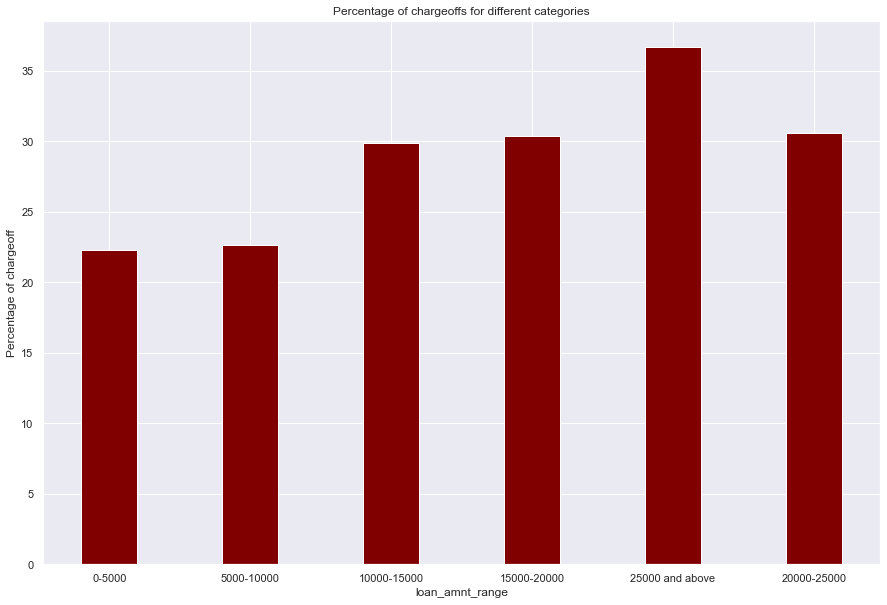


 annual_inc_range


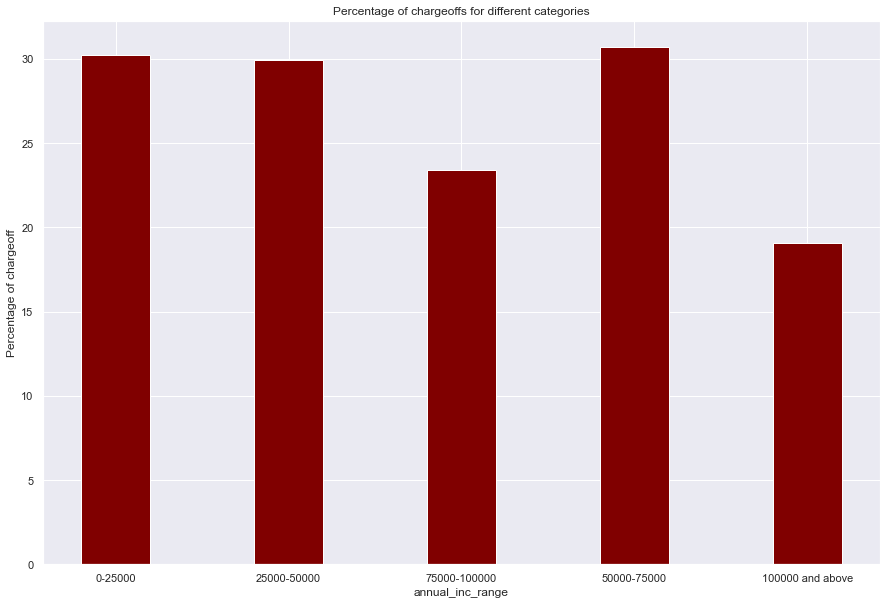


 int_rate_range


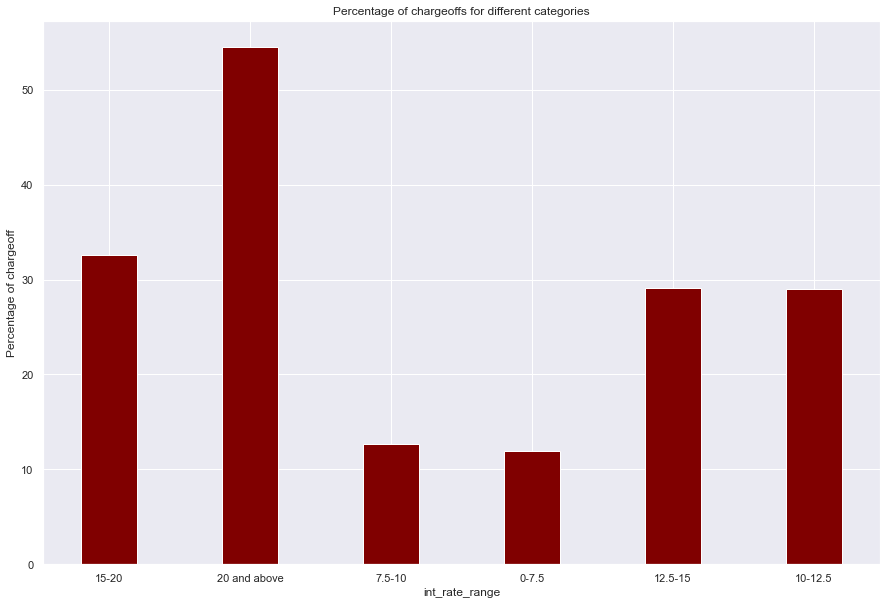

In [658]:
df_for_analysis_small_business = df_for_analysis_emp_length_not_na.loc[(df_for_analysis['purpose']=='small_business')]
attribute_list = ['grade','term','emp_length','loan_amnt_range','annual_inc_range','int_rate_range']
chargeoff_probability_analysis(df_for_analysis_small_business, attribute_list)

##### For givingloans for small business we already have seen there is huge risk of chargeoff. But following are the considerations under which loans can be given to make profit and investors would be ready to invest:
        1. Encourage this loan among A grade employees
        2. Give it for shorter term of 36 months
        3. Give it to people with less experience (<1 year, 2-3 years)
        4. Give smaller loans, 10k-25k has same chargeoff probability but it shoots up after 25k
        5. Give it to people with income group >75k
        6. Keep the interest low till 10

##### Let us check the relationship between dti and loan amount via a scatter plot

<AxesSubplot:xlabel='dti', ylabel='loan_amnt'>

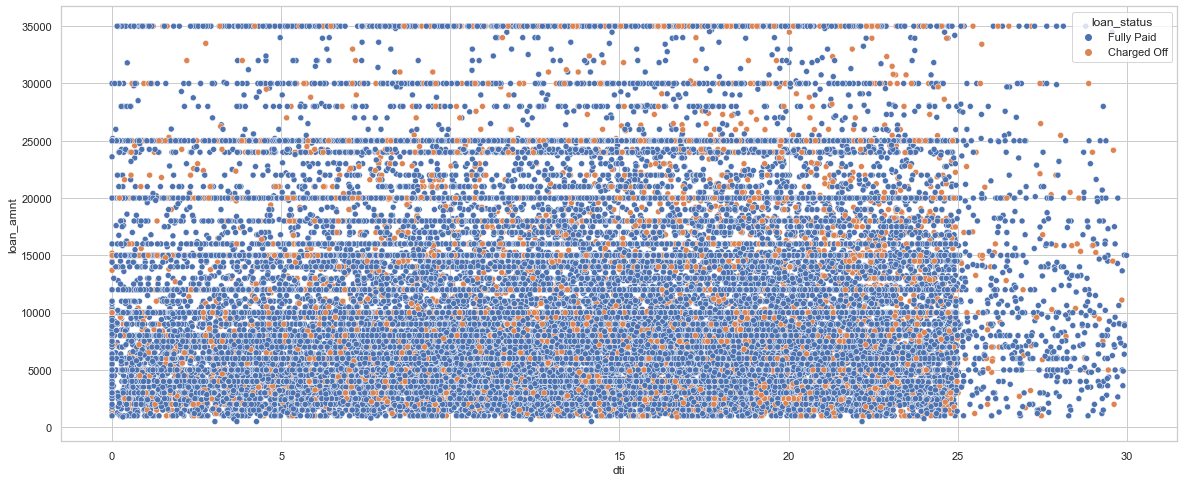

In [659]:
import seaborn
seaborn.set(style='whitegrid')
 
seaborn.scatterplot(x="dti",
                    y="loan_amnt",hue = 'loan_status',
                    data=df_for_analysis)

##### We can clearly see that the maximum loans have been given at dti ratio till 25 and the maximum number of loans have been provided from 0 to 25000 dollars. The outliers are something that we can possibly analyze if they are causing higher chargeoffs. It is very difiicult to make it out from the legends here if they cause higher chargeoffs.

In [661]:
df_for_analysis_outlier = df_for_analysis.loc[(df_for_analysis['loan_amnt']>25000) & (df_for_analysis['dti']>25)]

In [662]:
df_for_analysis_outlier['loan_status'].value_counts(normalize=True) * 100

Fully Paid     76.086957
Charged Off    23.913043
Name: loan_status, dtype: float64

In [663]:
df_for_analysis['loan_status'].value_counts(normalize=True) * 100

Fully Paid     85.413588
Charged Off    14.586412
Name: loan_status, dtype: float64

##### This clearly shows that higher loan amount given to people with higher dti leads to much higher probability of chargeoffs

##### We have seen earlier that higher loan amounts eads to higher chargeoffs (we have seen in previous analysis), is it same for dti as well, so we can confidently say that higher dti and higher loan amounts both contribute to chargeoffs in above scenario

##### We will now create bins for dti as well and compare them with chargeoff probability

In [664]:
# Creating bins here

# For dti

bins = [0, 5, 10, 15, 20, 25,30]
slot = ['0-5', '5-10', '10-15', '15-20', '20-25','25-30']
df_for_analysis['dti_range'] = pd.cut(df_for_analysis['dti'], bins, labels=slot)

In [665]:
df_for_analysis_dti_not_na = df_for_analysis[df_for_analysis['dti'].notna()]


 dti_range


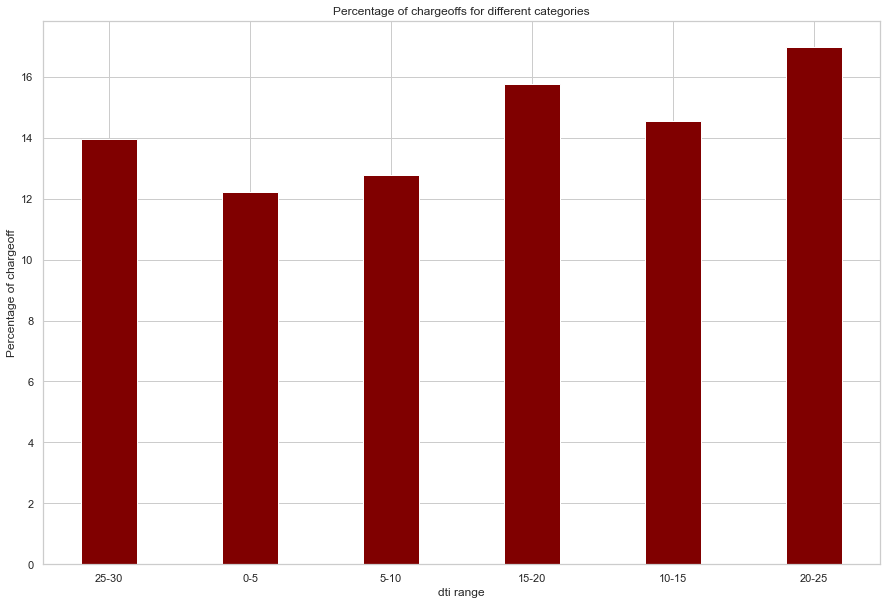

In [666]:
candidates = ['dti_range']
for j in range(len(candidates)):
    dictionary = {}
    l = df_for_analysis_dti_not_na[candidates[j]].unique()
    print('\n',candidates[j])
    for i in range(len(l)):
        if len(df_for_analysis_dti_not_na[df_for_analysis_dti_not_na[candidates[j]]==l[i]]) > 0:
            dictionary[l[i]] = 100*len(df_for_analysis_dti_not_na[(df_for_analysis_dti_not_na[candidates[j]]==l[i]) & (df_for_analysis_dti_not_na['loan_status']=='Charged Off')])/len(df_for_analysis_dti_not_na[df_for_analysis_dti_not_na[candidates[j]]==l[i]])

        
    property_status = list(dictionary.keys())
    values = list(dictionary.values())

    fig = plt.figure(figsize = (15, 10))

    # creating the bar plot
    plt.bar(property_status, values, color ='maroon',
            width = 0.4)

    plt.xlabel("dti range")
    plt.ylabel("Percentage of chargeoff")
    plt.title("Percentage of chargeoffs for different categories")
    plt.show()

##### High dti leads to high chargeoffs as well

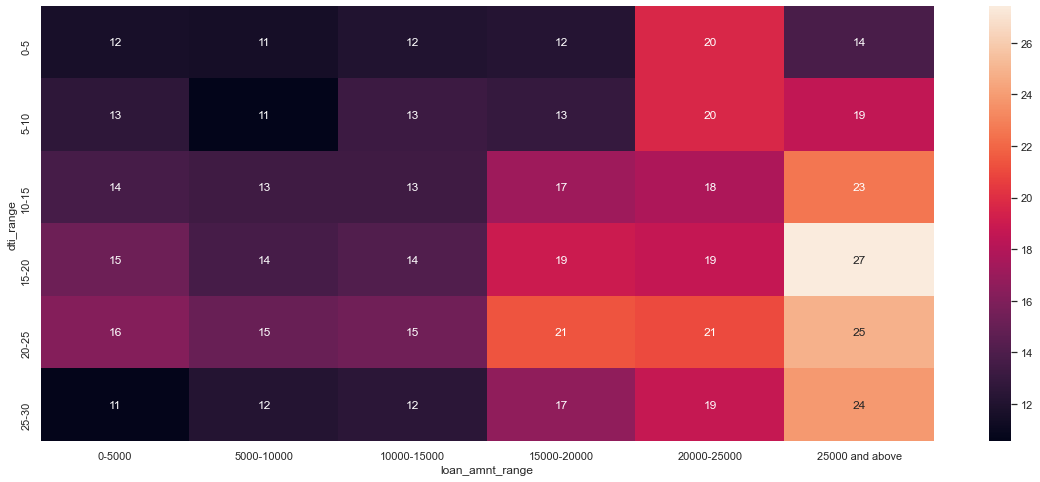

In [667]:
comparison_attributes = ['dti_range','loan_amnt_range']
bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis,comparison_attributes)

##### From this it is absolutely clear that higher loans should not be provided to people with higher dti. Giving smaller loans to people with high dti almost halves the probability of chargeoff

##### One thing that we had seen above was that the probability of chargeoff was among the highest in May and the number of applicants was among the lowest. We can actually check for which purpose the maximum chargeoffs are happening for this month

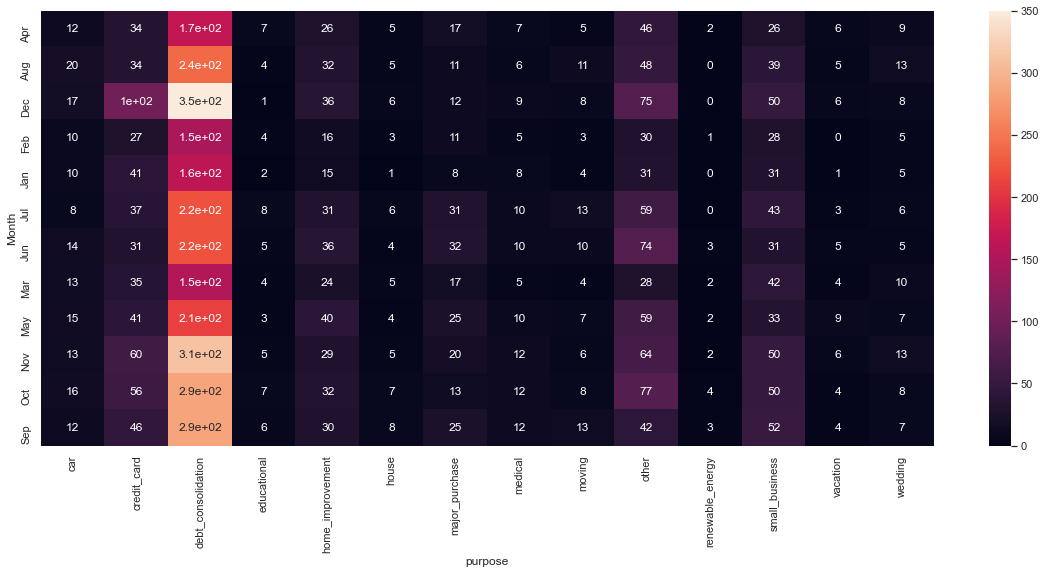

In [668]:
comparison_attributes = ['Month','purpose']
bivariate_analysis_heatmap_chargeoff_counts(df_for_analysis,comparison_attributes)

##### The number of chargeoffs for vacation seems to be highest for the month of May, is this making the chargeoff percentage for May to go up?

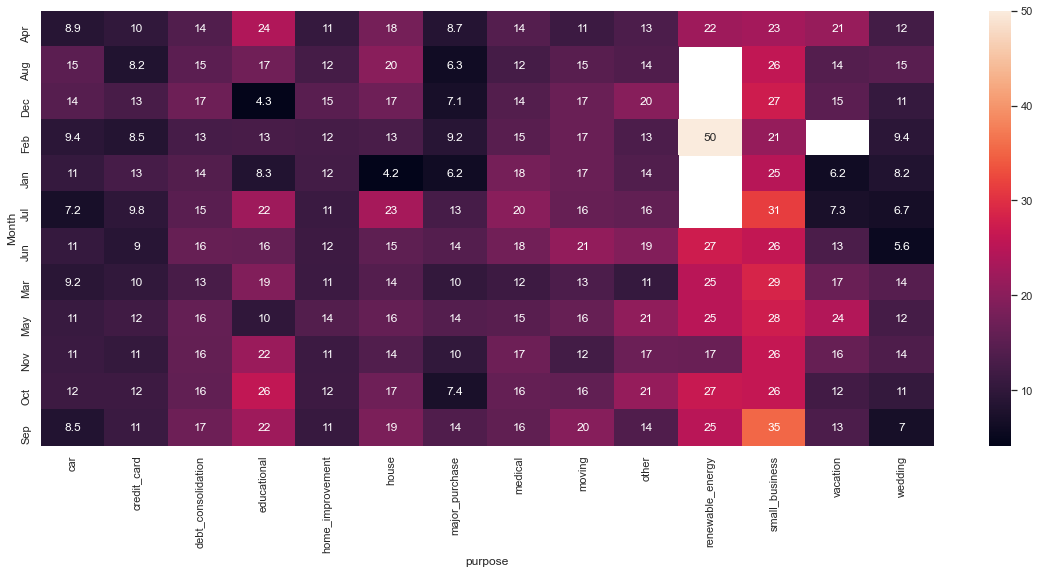

In [669]:
comparison_attributes = ['Month','purpose']
bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis,comparison_attributes)

##### Yes indeed, the chargeoff probability for vacation is highest in May

##### We can now check which income group is contributing the most to vacation loan chargeoffs

In [670]:
df_subset = df_for_analysis.loc[(df_for_analysis['purpose']=='vacation') & (df_for_analysis['Month'] == 'May') & (df_for_analysis['loan_status']=='Charged Off')]

In [671]:
df_subset[['annual_inc_range']].value_counts(normalize=True) * 100

annual_inc_range
25000-50000         44.444444
0-25000             33.333333
50000-75000         22.222222
75000-100000         0.000000
100000 and above     0.000000
dtype: float64

##### Looks like its the 25-50k group which is driving this. We can now do an analysis to check this income group charges off when they take loan for which purpose.

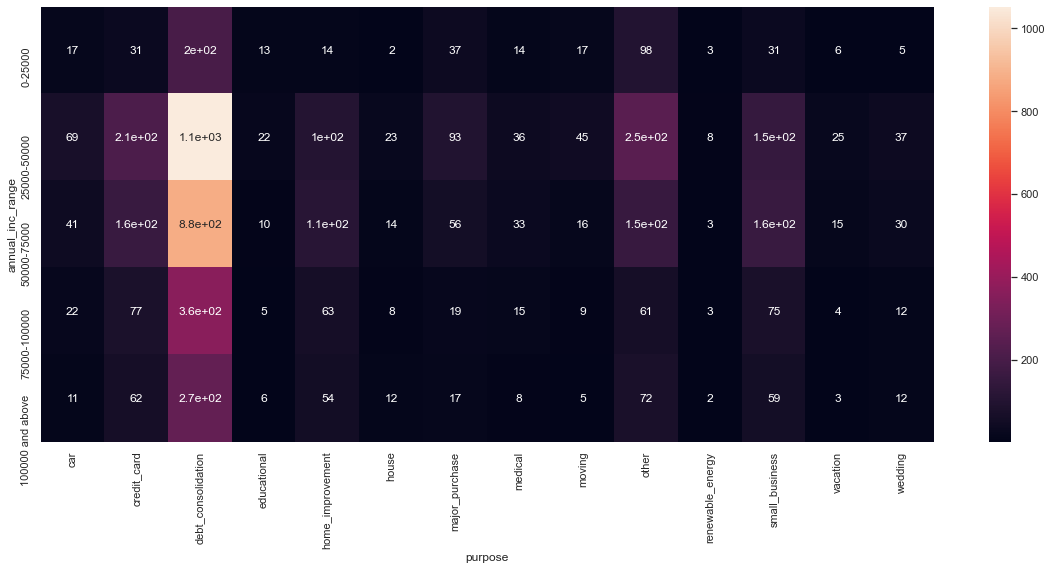

In [672]:
comparison_attributes = ['annual_inc_range','purpose']
bivariate_analysis_heatmap_chargeoff_counts(df_for_analysis,comparison_attributes)

##### Yes, in general 25-50k income group chargeoffs the most against their loan when they take the loan for vacation, compared to other income groups

##### We can also find out a matrix to check each income group probability of chargeoff when they take loan for which purpose

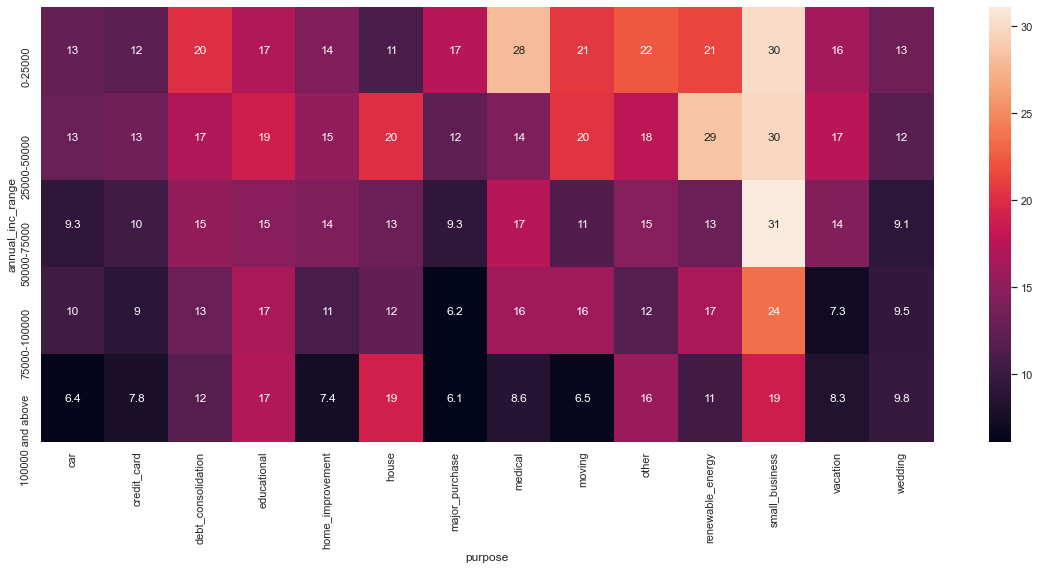

In [673]:
comparison_attributes = ['annual_inc_range','purpose']
bivariate_analysis_heatmap_chargeoff_prob(df_for_analysis,comparison_attributes)

##### For lower income groups (<75k) its clear that loan given for small business is pretty risky. For higher income groups, risk is still there for small business but it is offset by their high income, but there is slight risk in giving loans to these higher income groups for house and educational purpose (in fact the risk of chargeoff is as much for these purpose for high income groups as low income groups)

##### Finally, lets check the variation of grade with loan amount and interest and check where company can make more profit and minimize losses

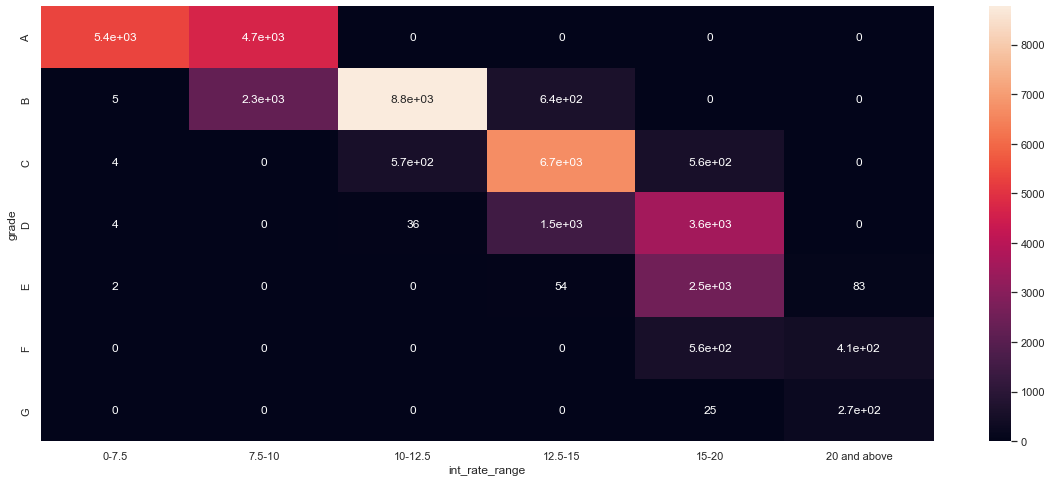

In [674]:
df_for_analysis_bivariate = df_for_analysis.loc[:,['id','grade','int_rate_range','loan_status']]
df_for_analysis_grouped = df_for_analysis_bivariate.groupby(['grade','int_rate_range'], as_index=False)["id"].count()
df_pivoted = df_for_analysis_grouped.pivot(index='grade', columns='int_rate_range', values='id')
ax = sns.heatmap(df_pivoted,annot=True)

##### Lower grade employees are not provided with lower interest rates due to probably their credit rating and incomes. But we have seen highest chargeoff probablity for F and G employees. They can't be given loans at lowest interest rates like A and B grade but at least more loans can be provided between 12.5 - 20 to ensure the company can get their money back from more people.

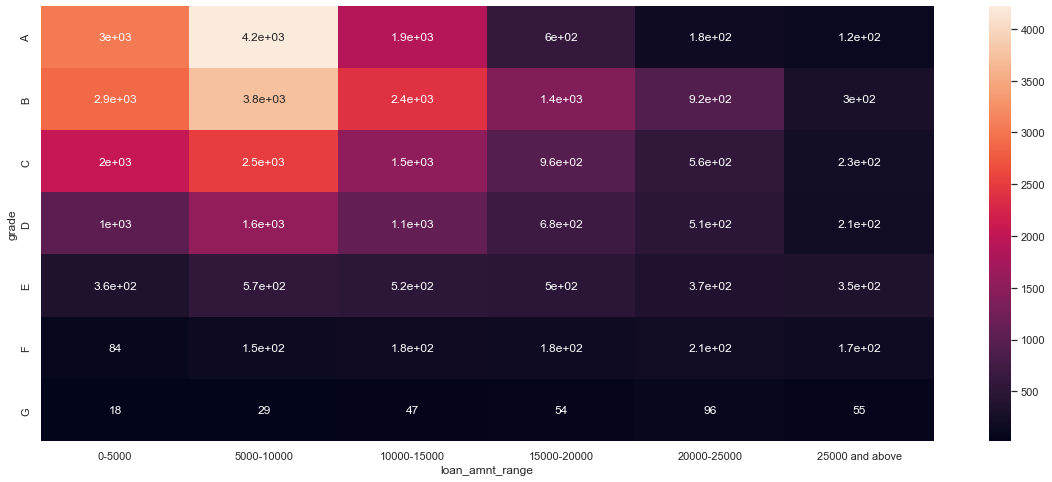

In [675]:
df_for_analysis_bivariate = df_for_analysis.loc[:,['id','grade','loan_amnt_range','loan_status']]
df_for_analysis_grouped = df_for_analysis_bivariate.groupby(['grade','loan_amnt_range'], as_index=False)["id"].count()
df_pivoted = df_for_analysis_grouped.pivot(index='grade', columns='loan_amnt_range', values='id')
ax = sns.heatmap(df_pivoted,annot=True)

##### Similarly, since higher grade employees cause least chargeoffs, there is a scope to encourage increase of the amount of loans given to A and B grade employees for more profits

## Bivariate analysis on continuous variables

##### Let's now check the distribution of the amount of loans taken by each income group

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='annual_inc_range'>

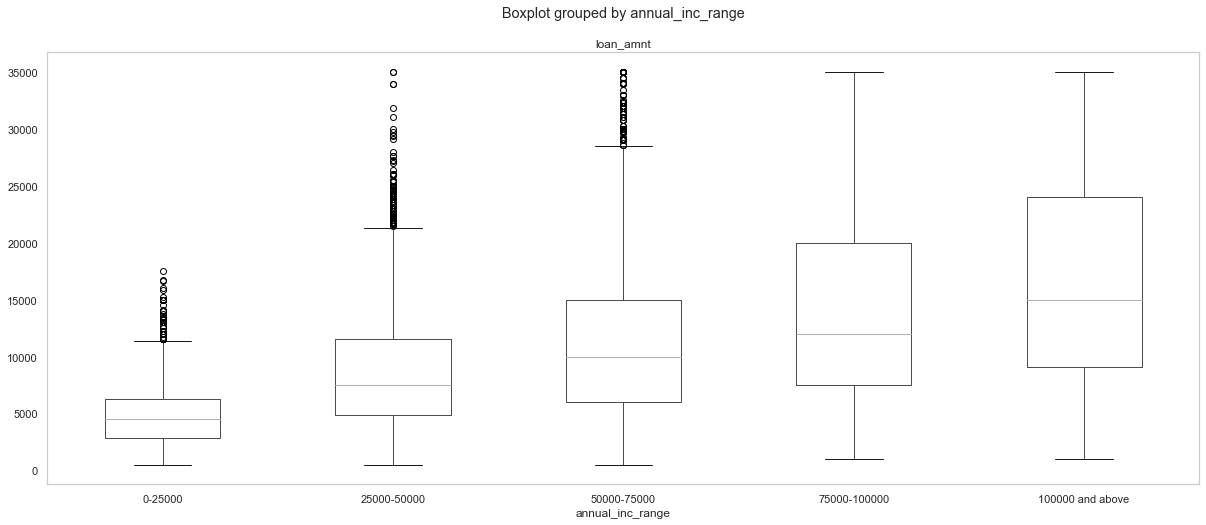

In [676]:
df_for_analysis.boxplot(by = 'annual_inc_range', column = 'loan_amnt', grid = False)

##### It is clear from the above boxplot that there are a lot of outliers for lower income group (maximum for 25-50k range). And we also know that maximum chargeoffs are happening for lower income groups, hence these outliers are a major reason for the high probability of chargeoff

In [677]:
df_for_analysis_lower_incomes = df_for_analysis.loc[(df_for_analysis['annual_inc_range']=='0-25000') | (df_for_analysis['annual_inc_range'] == '25000-50000')]
# df_for_analysis_lower_incomes.boxplot(by = 'purpose', column = 'loan_amnt', grid = False)

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='purpose'>

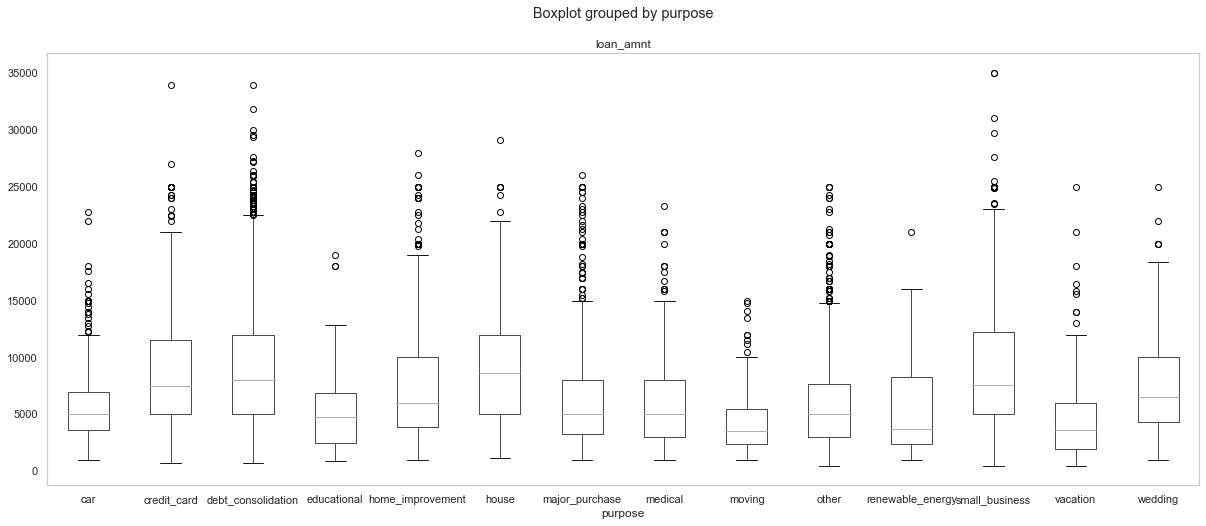

In [678]:
df_for_analysis_lower_incomes.boxplot(by = 'purpose', column = 'loan_amnt', grid = False)

##### For lower income groups the exception for loan amounts are made for almost every purpose, maximum for debt consolidation and small business

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

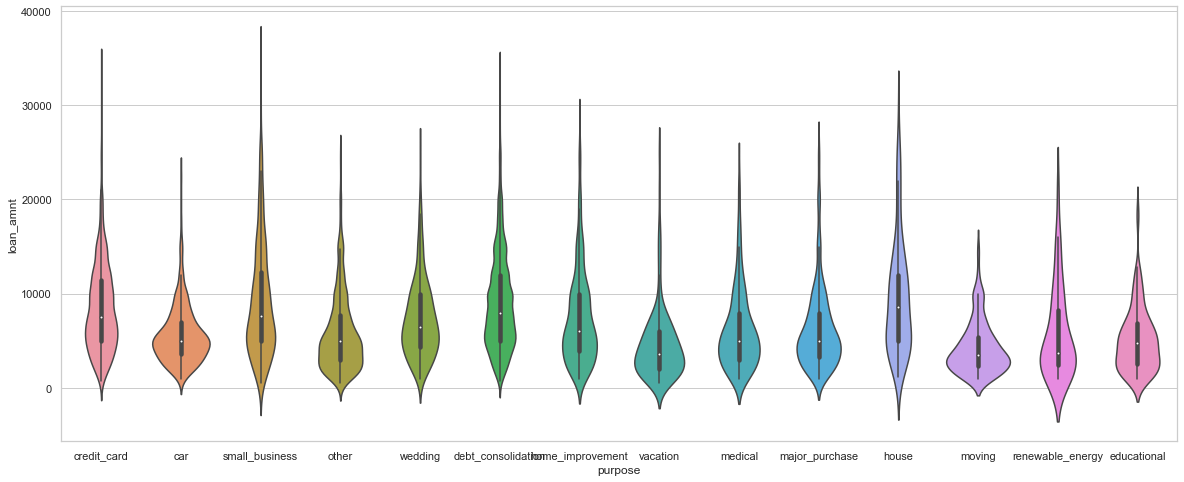

In [679]:
# ax = sns.violinplot(x=continent, y=life_exp)
# ax.set_title("Life Expectancy By Country")
# ax.set_ylabel("Gapminder Life Expectancy")
# ax.set_xlabel("Nations")

# plt.show()

sns.violinplot(x='purpose', y='loan_amnt', data=df_for_analysis_lower_incomes)

##### Is it only for loan amounts or interest rates for these lower income groups have many outliers?

<AxesSubplot:title={'center':'int_rate'}, xlabel='purpose'>

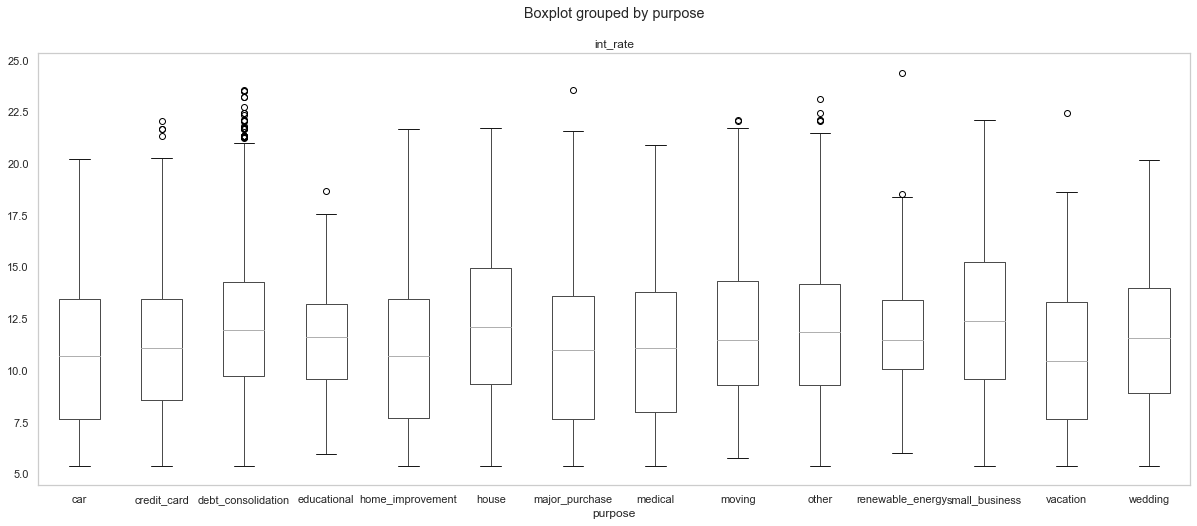

In [680]:
df_for_analysis_lower_incomes.boxplot(by = 'purpose', column = 'int_rate', grid = False)

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

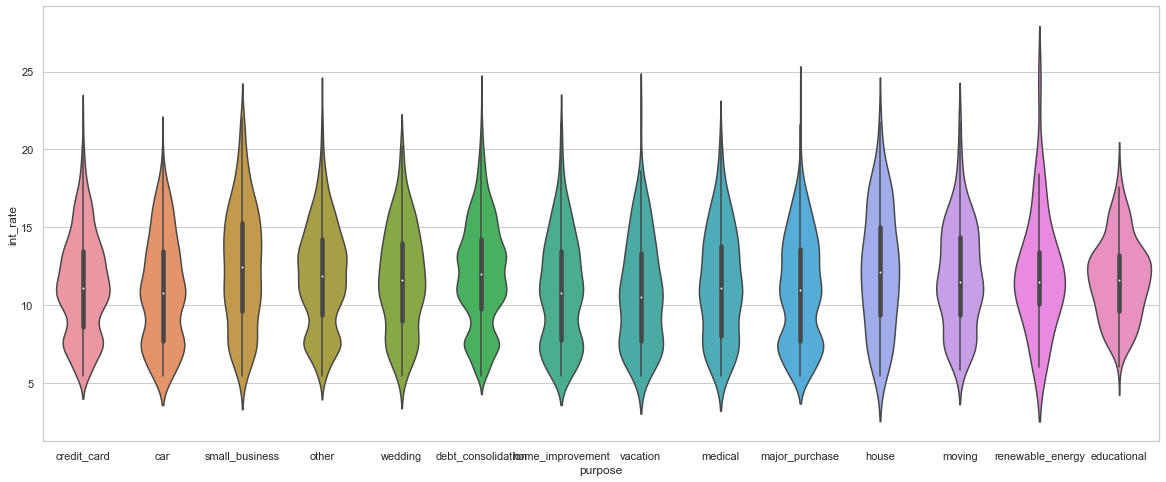

In [681]:
sns.violinplot(x='purpose', y='int_rate', data=df_for_analysis_lower_incomes)

##### Except for a few interest rates given at higher rates there are few outliers here. Hence it is clear that the high probability of chargeoff for lower income groups is higher because of high loans given to them, much higher than the median and .75 percentile amounts. The interest rates being offered have few outliers.

##### Finally lets do a similar analysis for lower grade of employees as well, these are the people who have highest probability of chargeoffs

In [682]:
patterns = ['E','F','G']
patterns_string = '|'.join(patterns)
df_for_analysis_lower_grades = df_for_analysis[df_for_analysis['grade'].str.contains(patterns_string)]

<AxesSubplot:title={'center':'loan_amnt'}, xlabel='purpose'>

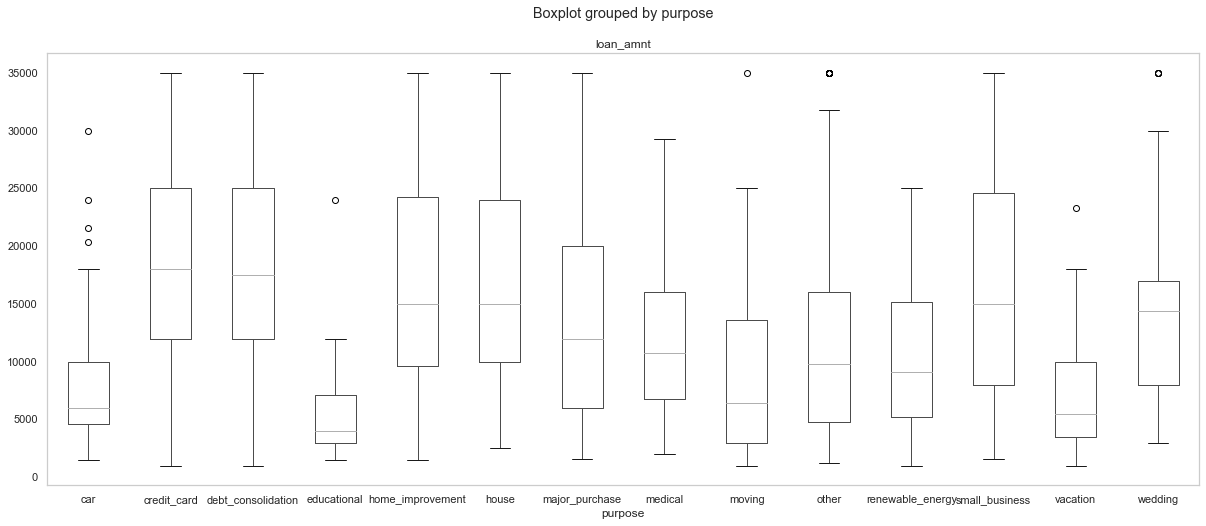

In [683]:
df_for_analysis_lower_grades.boxplot(by = 'purpose', column = 'loan_amnt', grid = False)

<AxesSubplot:xlabel='purpose', ylabel='loan_amnt'>

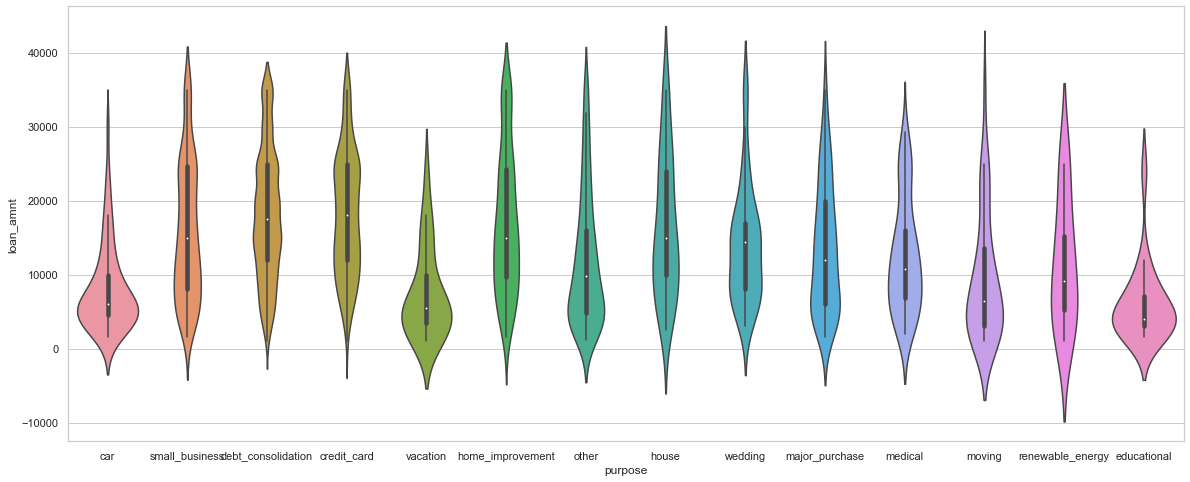

In [684]:
sns.violinplot(x='purpose', y='loan_amnt', data=df_for_analysis_lower_grades)

##### Doesn't look like they are being offered higher loan amounts. What about interest rates?

<AxesSubplot:title={'center':'int_rate'}, xlabel='purpose'>

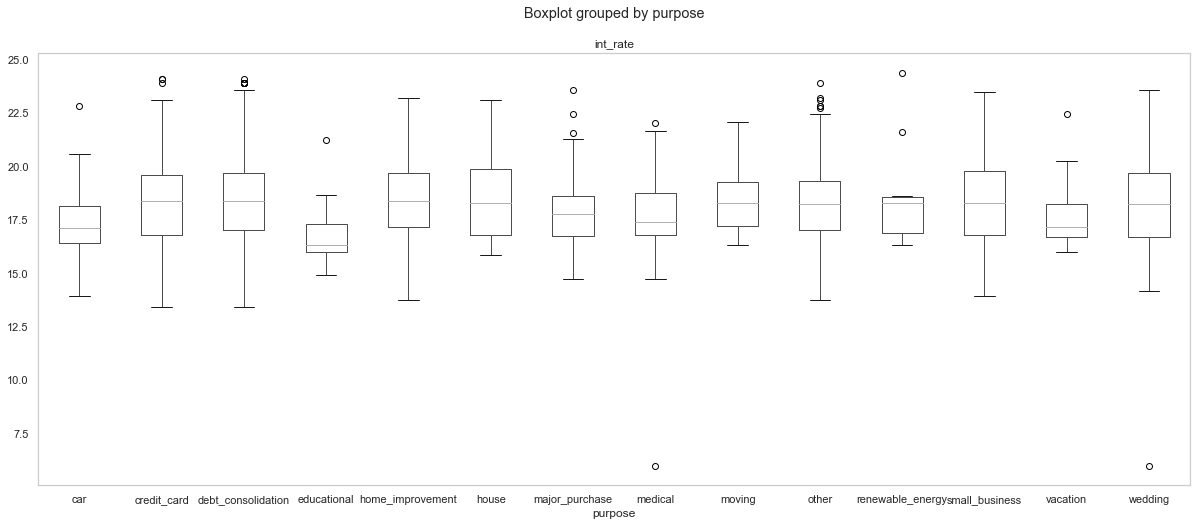

In [685]:
df_for_analysis_lower_grades.boxplot(by = 'purpose', column = 'int_rate', grid = False)

<AxesSubplot:xlabel='purpose', ylabel='int_rate'>

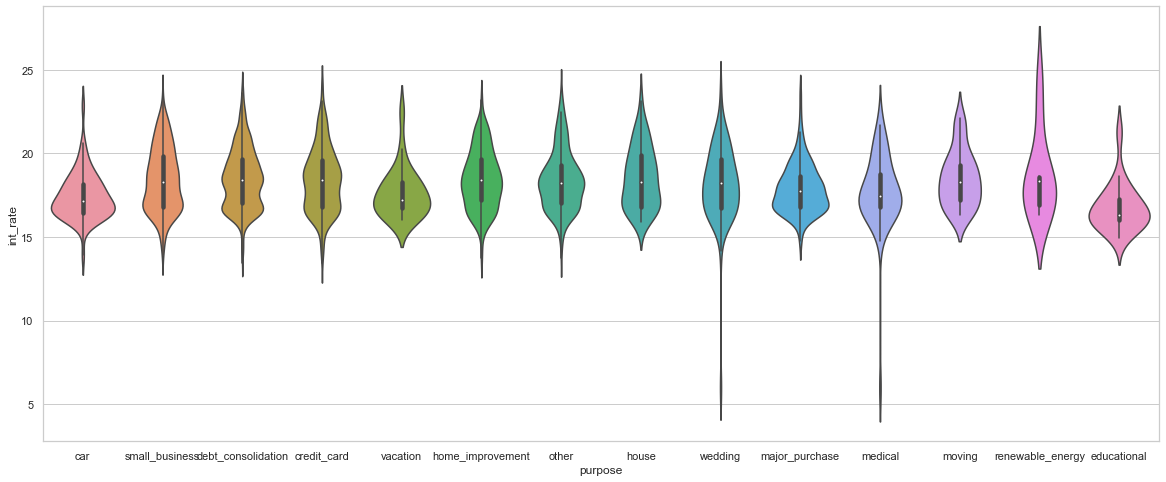

In [686]:
sns.violinplot(x='purpose', y='int_rate', data=df_for_analysis_lower_grades)

##### Looks like they are being offered higher interest rates. And we have seen in our earlier analysis that higher interest rate results in higher probability of chargeoffs, hence lowering the interest rates slightly will benefit the lending company since they would be able to recover their loans. Higher interest rates benefit the lending company but if there are a high number of defaulters then the lending company takes a hit. They might be provided higher interest rates because of their lower grades and hence their credit rating but it is better to reject or offer them loans at a slightly lower price to benefit both the lending company and the person taking loan.